# Tinderlytics: Data Science Project

UIC CS 418, Fall 2023

#Introduction
This assignment will examine app usage, gender distribution, and education levels, we aim to uncover patterns and trends of online dating.

What patterns emerge from the way individuals engage with Tinder, and what do these patterns disclose about the contemporary landscape of online dating?

* How is gender distributed among users, and what are their preferences?
* What professions and education background dominate the Tinder user base?


Data comes in two forms:
* .json (536 mb)
* .csv (360mb)

Type of data:

* Quantitative:
* Count of app opens
* Messages sent
* Messages received
* Number of matches
* Number of likes
* Number of passes
* Categorical:
* Age
* Gender
* Gender preferences,
* Occupation
* Educational level

Github link:
* https://github.com/amoran9/tinderlytics

#Proposed Scope
We still aim to analyze Tinder data to gain insight on users behaviors. We’ll continue to explore how elements such as gender, education level, and job titles influence how the match rates occur. Our scope aligns with our goal of understanding user interactions and preferences on Tinder.

We did alter our proposal. Prior we were going to also focus on conversation dynamics and the frequency of user activity on the Tinder platform. Our team has decided to remove these parts of our project.


#Data Preparation

We begin with import our datasets. We converted the json objects into two data frames called user_data and conversationsMeta_data. Then began cleaning user_data.

* created new columns for ['jobs', 'schools', 'age']
* dealt with outliers in columns 'ageFilterMax' and 'ageFilterMin'
* removed columns 'spotify' and 'instagram'
* dealth with NaN values in ['schoolName', 'jobTitle', 'cityName', 'country']
* converted dtypes for user data columns ['education', 'birthDate', 'createDate', 'educationLevel', 'ageFilterMin', 'ageFilterMax']



## Prerequisites
###Connect file to Google Drive

In [ ]:
from google.colab import drive
drive.mount("/content/drive/", force_remount=True)

Mounted at /content/drive/


If you are running from a shared file on google drive, then you must run the cell below

In [ ]:
# This need to be ran to get the shared file in google colab
folder_id = '11krvtVsi1I7_LmtZ2KAAqNWmcsHAla_N'
folder_name = 'CS418_FinalProject'

%cd "/content/drive/.shortcut-targets-by-id/$folder_id/$folder_name"
!pwd  # This will print out the current working directory

/content/drive/.shortcut-targets-by-id/11krvtVsi1I7_LmtZ2KAAqNWmcsHAla_N/CS418_FinalProject
/content/drive/.shortcut-targets-by-id/11krvtVsi1I7_LmtZ2KAAqNWmcsHAla_N/CS418_FinalProject



## Setup Environment
If you've set up your environment properly, this cell should run without
problems:

* Seaborn can be used to display beautiful graphs.

In [ ]:
%pip install seaborn

* Using a streaming JSON parser like ijson, which can process large JSON files without loading the entire file into memory.

In [ ]:
pip install ijson

In [ ]:
pip install imbalanced-learn

In [ ]:
import math
import numpy as np
import matplotlib
from builtins import sum
%matplotlib inline
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm
plt.style.use('fivethirtyeight')
import pandas as pd
import json # Due to our Json being 536 mb we need to process it in smaller chunks.
import ijson
import datetime as dt

from matplotlib.sankey import Sankey
from collections import Counter
from datetime import datetime
# For ML
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report
from sklearn.utils import resample
from sklearn.metrics import roc_curve, auc
from pandas import json_normalize
from wordcloud import WordCloud
from imblearn.over_sampling import SMOTE

# To correct any font issues in code
common_fonts = ['DejaVu Sans', 'Liberation Sans', 'Noto Sans']
for font in common_fonts:
    try:
        # Attempt to set the font to one from the common fonts list
        plt.rcParams['font.family'] = font
        fm.findfont(font)
        break
    except Exception:
        continue
else:
    print("None of the common fonts are available. Reverting to default.")

# **1. Importing the data**

* Use libraries like pandas to import data from CSV and JSON files into DataFrame objects.
* Inspect the first few rows of the data using head() to ensure it's loaded correctly.
* Check data types and summary information using info() and describe().
* Printing output to test data and a small graph for testing (data is not clean)


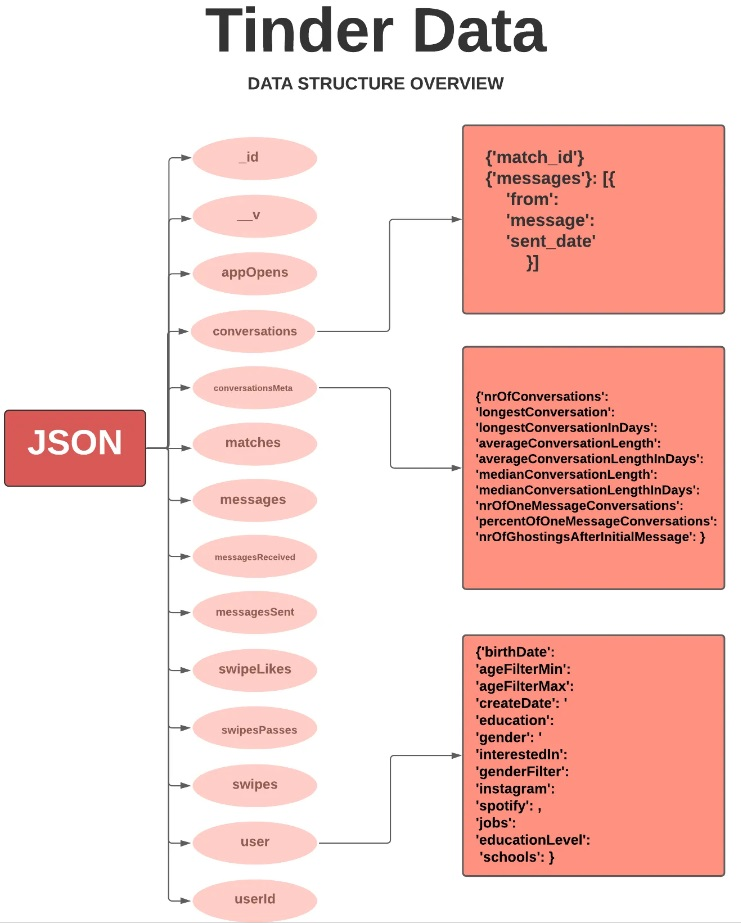


Import and construction of data is assigned to Sergio Ambelis Diaz

### Import CSV file

Running the csv and json files can take about a minute to fully import. Patience is a virtue.

CSV file contains conversations, metadata (gender, age, length of convo, etc)

#### Read .csv file

In [ ]:
# Read the tinder profiles csv.
tinder_csv = pd.read_csv('tinder_profiles_2021-11-10.csv')


<ipython-input-8-e00d101b6705>:2: DtypeWarning: Columns (23267) have mixed types. Specify dtype option on import or set low_memory=False.
  tinder_csv = pd.read_csv('tinder_profiles_2021-11-10.csv')


#### Print .csv file

In [ ]:
# Exlcude appOpens since it runs from late 2014 to 2021
# I skipped appOpens, matches, messages and swipesLikes in our csv input data due to too many columns.
column_names = [col for col in tinder_csv.columns]

# Print the list of column names excluding those that contain 'appOpens'
print(tinder_csv[column_names].head(0))

# Select only the filtered columns
filtered_data = tinder_csv[column_names].head(5)

# Save the filtered data to a new CSV file
filtered_data.to_csv('filtered_csv.csv', index=False)

Empty DataFrame
Columns: [__v, _id, appOpens.2014-11-10, appOpens.2014-11-12, appOpens.2014-11-13, appOpens.2014-11-14, appOpens.2014-11-15, appOpens.2014-11-16, appOpens.2014-11-17, appOpens.2014-11-18, appOpens.2014-11-19, appOpens.2014-11-20, appOpens.2014-11-21, appOpens.2014-11-22, appOpens.2014-11-27, appOpens.2014-11-28, appOpens.2014-11-29, appOpens.2014-11-30, appOpens.2014-12-07, appOpens.2014-12-08, appOpens.2014-12-16, appOpens.2014-12-17, appOpens.2014-12-18, appOpens.2014-12-22, appOpens.2014-12-23, appOpens.2014-12-24, appOpens.2014-12-25, appOpens.2014-12-26, appOpens.2014-12-27, appOpens.2014-12-29, appOpens.2014-12-30, appOpens.2014-12-31, appOpens.2015-01-01, appOpens.2015-01-02, appOpens.2015-01-03, appOpens.2015-01-04, appOpens.2015-01-05, appOpens.2015-01-06, appOpens.2015-01-07, appOpens.2015-01-08, appOpens.2015-01-09, appOpens.2015-01-10, appOpens.2015-01-11, appOpens.2015-01-12, appOpens.2015-01-13, appOpens.2015-01-14, appOpens.2015-01-15, appOpens.2015-01-16

### Import Tinder Json file.

Json contains objects, conversations, conversationsMeta, jobs, age, education level, etc.

* Can also take a minute


In [ ]:
# Define the path to your JSON file
file_json = 'tinder_profiles_2021-11-10.json'

# Open the file and parse it as a JSON object in a memory-efficient way
data = []
with open(file_json, 'rb') as file:
    for item in ijson.items(file, 'item'):
        data.append(item)

# Now data is a list of JSON objects that you can convert to a DataFrame
tinder_json = pd.DataFrame(data)

# View the first few user IDs
user_ids = tinder_json['_id']
print(user_ids.head())

0    00b74e27ad1cbb2ded8e907fcc49eaaf
1    024610702baf540af5637873cd1534e9
2    0a5e3dd8489fe67485ddb7d6adb26ebd
3    048dd37565ad9cbc24c163ffedffbf58
4    0eb998fdde77f9c123c07eace18a5cc1
Name: _id, dtype: object


#### Printing JSON data

The following below is a snippet of many other columns in our json file. Please note that we will see non-clean data (missing data (e.g. NaN), incorrect, and other bad data)


In [ ]:


# Flattening the 'user' column
user_data_flat = json_normalize(tinder_json['user'])
user_data_flat['_id'] = tinder_json['_id']
print(user_data_flat.head())



# Normalize 'matches' data if it exists
# Preparing to combine both data later
if 'matches' in tinder_json.columns:
    matches_data_flat = json_normalize(tinder_json['matches'])
    matches_data_flat['_id'] = tinder_json['_id']
    # Group and sum matches data if necessary
    matches_data_flat = matches_data_flat.groupby('_id').sum().reset_index()
    print(matches_data_flat.head())
else:
    print("No 'matches' column to flatten.")

# Flattening the 'messages' column
if 'messages' in tinder_json.columns:
    messages_data_flat = json_normalize(tinder_json['messages'])
else: # Condition for edge case
    print("No 'messages' column to flatten.")

                  birthDate  ageFilterMin  ageFilterMax   cityName  country  \
0  1976-01-01T00:00:00.000Z            21            35  Trondheim   Norway   
1  1997-07-04T00:00:00.000Z            18            29   Richmond       VA   
2  1998-02-06T00:00:00.000Z            20            24        NaN      NaN   
3  1998-02-24T00:00:00.000Z            20            25   Edmonton  Alberta   
4  1996-11-10T00:00:00.000Z            18            27        NaN      NaN   

                 createDate                                 education gender  \
0  2016-01-01T09:30:07.551Z  Has high school and/or college education      M   
1  2016-07-12T02:26:46.774Z  Has high school and/or college education      M   
2  2019-07-01T19:17:54.560Z   Has no high school or college education      M   
3  2019-09-25T03:28:20.920Z   Has no high school or college education      M   
4  2017-11-17T23:30:37.231Z   Has no high school or college education      M   

  interestedIn genderFilter  instagram spoti

This code processes Tinder user data from a JSON file. It starts by extracting and normalizing user-specific information, like birthdate and education, and appends a unique identifier (_id) to this data. The code also handles additional data like matches and conversation metadata, aggregating match details and ensuring each record is linked to the correct user via _id. Finally, it selects specific columns of interest from the normalized user data to display, such as age filters, gender, and education level, showcasing a snapshot of the processed data.



In [ ]:


user_id = tinder_json['_id']
# Normalize 'user' data
user_data = json_normalize(tinder_json['user'])
user_data['_id'] = user_id

matches_data = tinder_json.get('matches', {})

# Normalize 'conversationsMeta' data if it exists
if 'conversationsMeta' in tinder_json:
    conversationsMeta_data = json_normalize(tinder_json['conversationsMeta'])
    conversationsMeta_data['_id'] = user_id  # This assumes that the order of records matches between 'user' and 'conversationsMeta'
else:
    print("Key 'conversationsMeta' does not exist in the JSON data.")

if 'matches' in tinder_json:
  matches_data = json_normalize(tinder_json['matches'])
  matches_data['_id'] = user_id

  matches_data = matches_data.groupby('_id', sort=False).sum(numeric_only=True).sum(axis=1).reset_index()
  matches_data.columns = ['_id', 'totalMatches']

# Print columns to verify
print(user_data.columns)

# Select columns to display from 'user' data
columns_to_display = [
    '_id', 'birthDate', 'ageFilterMin', 'ageFilterMax', 'cityName', 'country',
    'createDate', 'education', 'gender', 'interestedIn', 'genderFilter',
    'instagram', 'spotify', 'jobs', 'educationLevel', 'schools'
]

# Display the selected data for 'user'
display_data = user_data.loc[:29, columns_to_display]
print(display_data)

Index(['birthDate', 'ageFilterMin', 'ageFilterMax', 'cityName', 'country',
       'createDate', 'education', 'gender', 'interestedIn', 'genderFilter',
       'instagram', 'spotify', 'jobs', 'educationLevel', 'schools', '_id'],
      dtype='object')
                                 _id                 birthDate  ageFilterMin  \
0   00b74e27ad1cbb2ded8e907fcc49eaaf  1976-01-01T00:00:00.000Z            21   
1   024610702baf540af5637873cd1534e9  1997-07-04T00:00:00.000Z            18   
2   0a5e3dd8489fe67485ddb7d6adb26ebd  1998-02-06T00:00:00.000Z            20   
3   048dd37565ad9cbc24c163ffedffbf58  1998-02-24T00:00:00.000Z            20   
4   0eb998fdde77f9c123c07eace18a5cc1  1996-11-10T00:00:00.000Z            18   
5   10a8c197447a3991d64136b315d6e87e  1994-04-16T00:00:00.000Z            30   
6   1a6bc90a124bed79741b441929c4d365  1976-01-01T00:00:00.000Z            21   
7   1c2f3d5f9d2ca312136fdf6e018a177d  1994-02-08T00:00:00.000Z            18   
8   1e74b4cb4b126a8f34b2d9b1fda

In [ ]:
# Used from code aboove to create an empty DataFrame for conversationsMeta data.
# Select columns to display from 'conversationsMeta' data
display_cols_conversationsMeta = [
    '_id', 'nrOfConversations', 'longestConversation', 'longestConversationInDays',
    'averageConversationLength', 'averageConversationLengthInDays',
    'medianConversationLength', 'medianConversationLengthInDays',
    'nrOfOneMessageConversations', 'percentOfOneMessageConversations',
    'nrOfGhostingsAfterInitialMessage'
]
print(display_cols_conversationsMeta)
print(conversationsMeta_data)

['_id', 'nrOfConversations', 'longestConversation', 'longestConversationInDays', 'averageConversationLength', 'averageConversationLengthInDays', 'medianConversationLength', 'medianConversationLengthInDays', 'nrOfOneMessageConversations', 'percentOfOneMessageConversations', 'nrOfGhostingsAfterInitialMessage']
      nrOfConversations  longestConversation longestConversationInDays  \
0                   739                  133         683.5574421296296   
1                   464                   36         622.4665277777777   
2                   303                   33        295.28341435185183   
3                    47                   28        130.03440972222222   
4                   809                  444        198.39097222222222   
...                 ...                  ...                       ...   
1204                  8                   42        6.9406944444444445   
1205                254                   15          89.4924537037037   
1206                 35 

In [ ]:
print(matches_data.columns)
print(conversationsMeta_data.columns)
print(user_data.columns)

Index(['_id', 'totalMatches'], dtype='object')
Index(['nrOfConversations', 'longestConversation', 'longestConversationInDays',
       'averageConversationLength', 'averageConversationLengthInDays',
       'medianConversationLength', 'medianConversationLengthInDays',
       'nrOfOneMessageConversations', 'percentOfOneMessageConversations',
       'nrOfGhostingsAfterInitialMessage', '_id'],
      dtype='object')
Index(['birthDate', 'ageFilterMin', 'ageFilterMax', 'cityName', 'country',
       'createDate', 'education', 'gender', 'interestedIn', 'genderFilter',
       'instagram', 'spotify', 'jobs', 'educationLevel', 'schools', '_id'],
      dtype='object')


### Join both data sets (CSV and JSON)


This code merges Tinder profile data from two sources: a CSV file and a JSON file. It first combines these datasets based on a common identifier (_id), using an 'outer' join to ensure no data is lost from either source. Then, it merges additional data related to matches from the JSON file. After merging, it converts the birthDate and createDate fields from strings to datetime objects, and calculates the users' ages. Finally, it fills in missing values for city and country names with placeholder text and displays the first few rows of the combined data for verification. The goal is to create a comprehensive dataset that includes user profiles, their matches, and additional derived information like age.


By: Sergio Ambelis Diaz

In [ ]:
# Merge the two dataframes on '_id' and assign to user_data
# Using outer to keep data from both data sets since they should both be clean now.
user_data = pd.merge(tinder_csv, tinder_json, on='_id', how='outer')
user_data = user_data_flat.merge(matches_data_flat, on='_id', how='left')

# # Display the combined data
# Still shows NaN therefore we have to have accordingly the columns
# print(user_data.head())

# Handling some missing data below:

# Convert birthDate and createDate from string to datetime
user_data['birthDate'] = pd.to_datetime(user_data['birthDate'], errors='coerce')
user_data['createDate'] = pd.to_datetime(user_data['createDate'], errors='coerce')

# Calculate age
user_data['age'] = (user_data['createDate'] - user_data['birthDate']).dt.days // 365

# Handle NaN values and other data processing steps...
user_data['cityName'].fillna("Unknown City", inplace=True)
user_data['country'].fillna("Unknown Country", inplace=True)

# Display a portion of the combined data for verification
print(user_data.head())

                  birthDate  ageFilterMin  ageFilterMax      cityName  \
0 1976-01-01 00:00:00+00:00            21            35     Trondheim   
1 1997-07-04 00:00:00+00:00            18            29      Richmond   
2 1998-02-06 00:00:00+00:00            20            24  Unknown City   
3 1998-02-24 00:00:00+00:00            20            25      Edmonton   
4 1996-11-10 00:00:00+00:00            18            27  Unknown City   

           country                       createDate  \
0           Norway 2016-01-01 09:30:07.551000+00:00   
1               VA 2016-07-12 02:26:46.774000+00:00   
2  Unknown Country 2019-07-01 19:17:54.560000+00:00   
3          Alberta 2019-09-25 03:28:20.920000+00:00   
4  Unknown Country 2017-11-17 23:30:37.231000+00:00   

                                  education gender interestedIn genderFilter  \
0  Has high school and/or college education      M            F            F   
1  Has high school and/or college education      M            F       



#2. Cleaning the data

* Handle missing values by either filling them in with appropriate values or dropping them.
* Correct data types if necessary (e.g., converting dates stored as strings into datetime objects).
* Remove duplicates, and perform any necessary data transformation (e.g., normalizing or scaling).


###Cleaning Data

Creating new columns for jobs and schools. Remove outliers from ageFilterMin and ageFilterMax. Removed instagram and spotify columns. Doing necessary conversions of dtypes in user and matches data.
Dealing with inconsistencies in jobTitle, cityName, country.

In [ ]:
# -------------------------------------------------------------------
# User Data: Creating new columns for ['jobs', 'schools', 'age']
# -------------------------------------------------------------------

# Store names of schools in column schoolName
user_data['schoolName'] = None #create empty schoolName col

# iterate through the school data nested in user_data
# append school names in schoolName
for index, school_data in enumerate(user_data['schools']):
  if isinstance(school_data, list) and len(school_data) > 0 and 'name' in school_data[0]:
    user_data.at[index, 'schoolName'] = school_data[0]['name']

# Store names of job titles in column jobTitle
user_data['jobTitle'] = None # create empty jobTitle col

# iterate through the jobs data nested in user_data
# append job titles in jobTitle
for index, jobs_data in enumerate(user_data['jobs']):
  if isinstance(jobs_data, list) and len(jobs_data) > 0 and 'title' in jobs_data[0]:
    user_data.at[index, 'jobTitle'] = jobs_data[0]['title']

  # change False to None to keep jobTitle consistent
  user_data['jobTitle'] = user_data['jobTitle'].replace(False, None)

# creating columns for users age relative to when they created their Tinder account
user_data['birthDate'] = pd.to_datetime(user_data['birthDate'])
user_data['createDate'] = pd.to_datetime(user_data['createDate'])

user_data['age'] = (user_data['createDate'] - user_data['birthDate']).astype('<m8[Y]')
user_data['age'] = user_data['age'].astype(int)

# -------------------------------------------------------------------
# User Data: Dealing with Outliers in ageFilterMin and ageFilterMax
# -------------------------------------------------------------------
outlier = user_data['ageFilterMax'] > 100
user_data = user_data[~outlier].copy()

# -------------------------------------------------------------------
# User Data: Removing spotify and instagram columns
# -------------------------------------------------------------------
user_data.drop(columns=['instagram', 'spotify', 'jobs', 'schools'], inplace=True)

# -------------------------------------------------------------------
# User Data: Dealing with NaN Values in
# ['schoolName', 'jobTitle', 'cityName', 'country']
# -------------------------------------------------------------------

user_data['cityName'].fillna("Unknown City", inplace=True)
user_data['country'].fillna("Unknown Country", inplace=True)

# -------------------------------------------------------------------
# User Data: Converting dtypes for user data columns:
# [education, birthDate, createDate, educationLevel, ageFilterMin, ageFilterMax]
# -------------------------------------------------------------------

# Convert birthDate and createDate from object to datetime
user_data['birthDate'] = pd.to_datetime(user_data['birthDate'], format='%Y-%m-%d', errors='coerce')
user_data['createDate'] = pd.to_datetime(user_data['createDate'], format='%Y-%m-%d', errors='coerce')

# Convert education and educationLevel from object to int, 0 being has no education and 1 being has education
user_data['education'] = user_data['education'].replace({'Has no high school or college education': 0, 'Has high school and/or college education': 1})
user_data['education'] = user_data['education'].astype(int)

user_data['educationLevel'] = user_data['educationLevel'].replace({'Has no high school or college education': 0, 'Has high school and/or college education': 1})
user_data['educationLevel'] = user_data['educationLevel'].astype(int)

# convert ageFilterMin and ageFilterMax from float to int
user_data['ageFilterMin'] = user_data['ageFilterMin'].astype(int)
user_data['ageFilterMax'] = user_data['ageFilterMax'].astype(int)


In [ ]:
# convert total matches from float to int
matches_data['totalMatches'] = matches_data['totalMatches'].astype(int)

# filter matches using IQR
q1_matches = matches_data['totalMatches'].quantile(0.25)
q3_matches = matches_data['totalMatches'].quantile(0.75)
iqr_matches = q3_matches - q1_matches
low_bound_matches = q1_matches - 1.5 * iqr_matches
up_bound_matches = q3_matches + 1.5 * iqr_matches
matches_data_filtered = matches_data[(matches_data['totalMatches'] >= low_bound_matches) & (matches_data['totalMatches'] <= up_bound_matches)]


###Copy of Clean User Data
Running to make a copy of user and matches data into a new dataFrames.

In [ ]:
clean_user_data = user_data.copy()
clean_matches_data = matches_data_filtered.copy()
tinder = pd.merge(clean_user_data, clean_matches_data, on='_id', how='left')
print(tinder.head(2))
clean_user_data = tinder.copy()

                  birthDate  ageFilterMin  ageFilterMax   cityName country  \
0 1976-01-01 00:00:00+00:00            21            35  Trondheim  Norway   
1 1997-07-04 00:00:00+00:00            18            29   Richmond      VA   

                        createDate  education gender interestedIn  \
0 2016-01-01 09:30:07.551000+00:00          1      M            F   
1 2016-07-12 02:26:46.774000+00:00          1      M            F   

  genderFilter  ...  2015-04-08 2015-04-10  2015-04-11  2015-04-12  \
0            F  ...         0.0        0.0         0.0         0.0   
1            F  ...         0.0        0.0         0.0         0.0   

   2015-04-15  2015-05-01  age  schoolName  jobTitle  totalMatches  
0         0.0         0.0   40        None      None           NaN  
1         0.0         0.0   19        None      None         888.0  

[2 rows x 2340 columns]


# 3. Analyze data

An interesting issue that we saw was how users would choose not to include addtional information regarding their job title or school. We can draw further hypothesises regarding this issue.

* Conduct exploratory data analysis (EDA) to identify patterns, outliers, and insights.
* Perform statistical analysis and hypothesis testing if necessary to draw conclusions from the data.
* Use feature engineering to create new informative features that can aid in the analysis.

In [ ]:
print(f"{clean_user_data.columns}\n")
print(f"{clean_matches_data.columns}\n")
print(f"{clean_user_data}\n")
print(f"{clean_matches_data}\n")
print(f"{clean_user_data.describe()}\n")
print(f"{clean_matches_data.describe()}\n")

print(f"\n{tinder}\n")

Index(['birthDate', 'ageFilterMin', 'ageFilterMax', 'cityName', 'country',
       'createDate', 'education', 'gender', 'interestedIn', 'genderFilter',
       ...
       '2015-04-08', '2015-04-10', '2015-04-11', '2015-04-12', '2015-04-15',
       '2015-05-01', 'age', 'schoolName', 'jobTitle', 'totalMatches'],
      dtype='object', length=2340)

Index(['_id', 'totalMatches'], dtype='object')

                     birthDate  ageFilterMin  ageFilterMax      cityName  \
0    1976-01-01 00:00:00+00:00            21            35     Trondheim   
1    1997-07-04 00:00:00+00:00            18            29      Richmond   
2    1998-02-06 00:00:00+00:00            20            24  Unknown City   
3    1998-02-24 00:00:00+00:00            20            25      Edmonton   
4    1996-11-10 00:00:00+00:00            18            27  Unknown City   
...                        ...           ...           ...           ...   
1125 1994-07-18 00:00:00+00:00            18            40       Utrecht  

Prints a statistical summary of conversation metrics, showing counts, means, standard deviations, minimums, quartiles, and maximums for the number of conversations, the length of the longest conversation, and instances of being ghosted after an initial message.

In [ ]:
# Create general statistics on our conversationsMeta data.

stats_conversationsMeta = conversationsMeta_data.describe()
stats_conversationsMeta = stats_conversationsMeta.applymap(lambda x: f'{x:.2f}')

print(stats_conversationsMeta)

      nrOfConversations longestConversation medianConversationLength  \
count           1209.00             1209.00                  1209.00   
mean             241.92              139.12                     4.28   
std              674.59              226.29                    28.00   
min                0.00                0.00                     0.00   
25%               20.00               27.00                     1.00   
50%               67.00               69.00                     2.00   
75%              226.00              161.00                     3.00   
max            12642.00             2264.00                   920.00   

      nrOfOneMessageConversations nrOfGhostingsAfterInitialMessage  
count                     1209.00                          1209.00  
mean                        75.73                            29.52  
std                        230.04                           149.19  
min                          0.00                             0.00  
25%   

Output and inspect the structure and subset of the conversationsMeta dataset, which contains metadata about user interactions on Tinder

In [ ]:
print((conversationsMeta_data.columns))
print("\n")
# Display the selected data for 'conversationsMeta'
display_conversationsMeta_data = conversationsMeta_data.loc[:10, display_cols_conversationsMeta]
print(display_conversationsMeta_data) # Printing for testing purposes only

Index(['nrOfConversations', 'longestConversation', 'longestConversationInDays',
       'averageConversationLength', 'averageConversationLengthInDays',
       'medianConversationLength', 'medianConversationLengthInDays',
       'nrOfOneMessageConversations', 'percentOfOneMessageConversations',
       'nrOfGhostingsAfterInitialMessage', '_id'],
      dtype='object')


                                 _id  nrOfConversations  longestConversation  \
0   00b74e27ad1cbb2ded8e907fcc49eaaf                739                  133   
1   024610702baf540af5637873cd1534e9                464                   36   
2   0a5e3dd8489fe67485ddb7d6adb26ebd                303                   33   
3   048dd37565ad9cbc24c163ffedffbf58                 47                   28   
4   0eb998fdde77f9c123c07eace18a5cc1                809                  444   
5   10a8c197447a3991d64136b315d6e87e                122                  808   
6   1a6bc90a124bed79741b441929c4d365                258                

The code checks and displays the data types of each column in two datasets, conversationsMeta and user_data, and then identifies any columns within the user_data that contain missing values, specifically highlighting if there are any gaps in the schoolName and jobTitle columns.

In [ ]:
# -------------------------------------------------------------------
# Data type checking
# -------------------------------------------------------------------

# Checking conversationsMeta
print("Data types for conversationsMeta data:")
data_type_conversationsMeta = conversationsMeta_data.dtypes
print(f"{data_type_conversationsMeta}\n")

# Checking user
print("Data types for user:")
data_type_user = user_data.dtypes
print(f"{data_type_user}\n")


# -------------------------------------------------------------------
# Check NaN values in all user data columns
# -------------------------------------------------------------------
print("\nNan Values Found in Columns:")
check_nan_userData = ['birthDate', 'ageFilterMin', 'ageFilterMax', 'cityName', 'country',
    'createDate', 'education', 'gender', 'interestedIn', 'genderFilter', 'educationLevel', 'schoolName', 'jobTitle', 'totalMatches']
genders = ['F', 'M']

for column in check_nan_userData:
  nan_value_true = tinder[column].isna().any()
  if (nan_value_true):
    print(f"{column}: {nan_value_true}")

for gender in genders:
  contain = user_data[user_data['gender'] == gender]
  nan_value_true = contain['gender'].isna().any()
  if (nan_value_true):
    print(f"{gender}: {nan_value_true}")

Data types for conversationsMeta data:
nrOfConversations                    int64
longestConversation                  int64
longestConversationInDays           object
averageConversationLength           object
averageConversationLengthInDays     object
medianConversationLength             int64
medianConversationLengthInDays      object
nrOfOneMessageConversations          int64
percentOfOneMessageConversations    object
nrOfGhostingsAfterInitialMessage     int64
_id                                 object
dtype: object

Data types for user:
birthDate       datetime64[ns, UTC]
ageFilterMin                  int64
ageFilterMax                  int64
cityName                     object
country                      object
                       ...         
2015-04-15                  float64
2015-05-01                  float64
age                           int64
schoolName                   object
jobTitle                     object
Length: 2339, dtype: object


Nan Values Found in Column

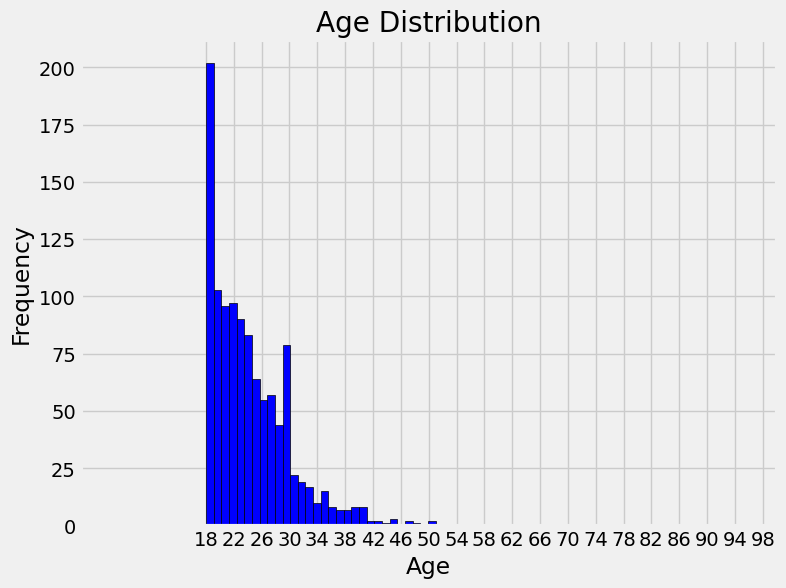

In [ ]:
# visualize age distribution
filtered_data = clean_user_data[(clean_user_data['age'] >= 18) & (clean_user_data['age'] <= 100)]
plt.figure(figsize=(8,6))
plt.hist(filtered_data['age'], bins=30, color='blue', edgecolor='black')
plt.title('Age Distribution')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.grid(True)
plt.xlim(0,100)
plt.xticks(range(18,101,4))
plt.show()

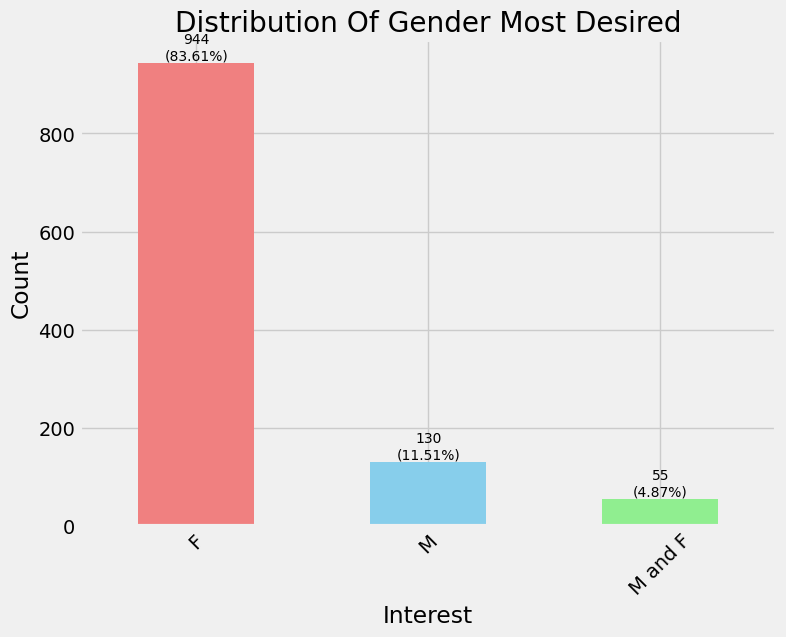

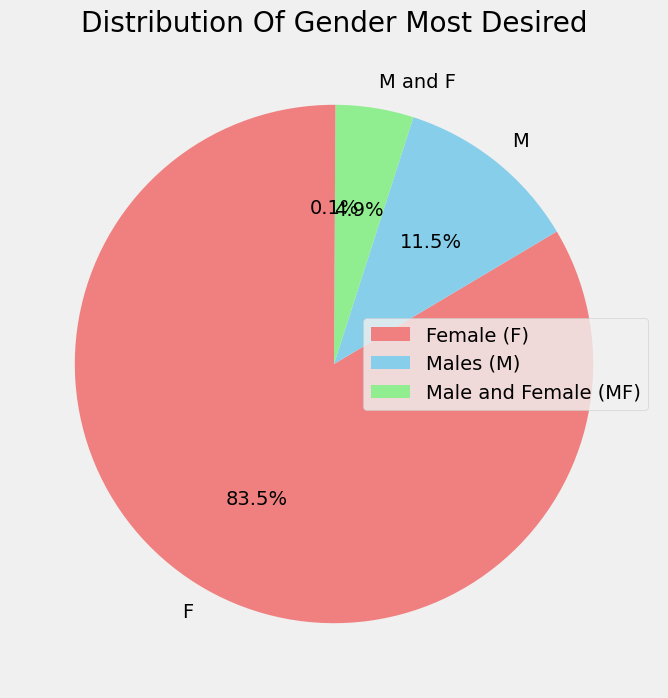

In [ ]:
plt.figure(figsize=(8, 6))
interestIn_count = clean_user_data['interestedIn'].value_counts()
interestIn_count = interestIn_count[interestIn_count > 1]
interestedIn_plot = interestIn_count.plot(kind='bar', color=['lightcoral', 'skyblue', 'lightgreen'])

for index, value in enumerate(interestIn_count):
  percentage = (value / interestIn_count.sum()) * 100
  interestedIn_plot.text(index, value + 0.1,
                         f'{value}\n({percentage:.2f}%)', ha='center', va='bottom', fontsize=10)

plt.title('Distribution Of Gender Most Desired')
plt.xlabel('Interest')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()

# Create a pie chart for 'Interested In' variable
plt.figure(figsize=(8, 8))
clean_user_data['interestedIn'].value_counts().plot(kind='pie', autopct='%1.1f%%', startangle=90, colors=['lightcoral', 'skyblue', 'lightgreen'])
plt.title('Distribution Of Gender Most Desired')
plt.ylabel('')
plt.legend(['Female (F)', 'Males (M)', 'Male and Female (MF)'])
plt.show()

# 4. Visualize data

* Create visualizations to represent the data and analysis findings using matplotlib, seaborn, or other visualization libraries.
* Use visualizations like histograms, box plots, scatter plots, and line charts to understand the distribution and relationships in the data.
* Present the visualizations in a way that communicates the results clearly and effectively to stakeholders.

Illustrates the distribution of professions across our Tinder users. Jobs within the computer science and engineering field are far more numerous than other jobs such as education or medical. There were several titles inputed that were not legitimate professions and thus were filtered into an outliers category.

We wanted to explore the most popular jobs that Tinder users had based on our hypothesis to better understand the Tinder community.

Created by Becca

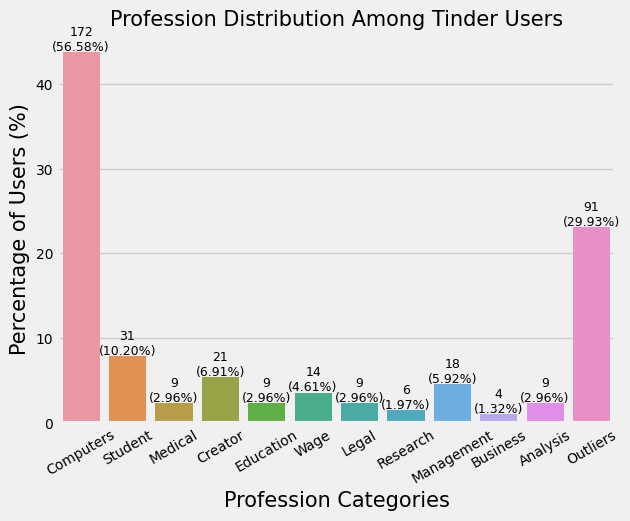

In [ ]:
job_counts = tinder['jobTitle'].value_counts()
# different job keywords for combining data
computer_jobs = ["dev", "comp", "tech", "engineer", "it", "data", "program", "hacker", "ingenieur", "ux", "web", "service"]
analysis = ["analyst"]
medical_jobs = ["medi", "cna", "surgery", "pfizer", "physician", "therapist", "chemist"]
content_jobs = ["writer", "artist", "editor", "animator", "video", "theater", "theatre", "photo", "producer", "product", "design"]
students = ["student", "senior", "graduate"]
education_jobs = ["teacher", "instructor", "tutor", "professor", "educator", "lecturer"]
wage_jobs = ["retail", "barista", "mcdonald's", "server", "walker", "driver", "line", "trucker", "pizza", "lifeguard"]
legal_jobs = ["legal", "defence", "consultant"]
research = ["research"]
management = ["manage", "admin", "director", "ceo\n", "advisor"]
business = ["business", "entrepreneur", "investor", "sales", "finance", "financial"]
# new series of job titles
new_job_counts = pd.Series(data=[0,0,0,0,0,0,0,0,0,0,0,0],
                           index=['Computers','Student','Medical', 'Creator', 'Education', 'Wage', 'Legal', 'Research', 'Management', 'Business', 'Analysis', 'Outliers'])

# merging like jobs
for job in job_counts.index:
  lower_job = job.lower()
  if any(substr in lower_job for substr in computer_jobs):
    new_job_counts[0] += job_counts[[job]]
  elif any(substr in lower_job for substr in students):
    new_job_counts[1] += job_counts[[job]]
  elif any(substr in lower_job for substr in medical_jobs):
    new_job_counts[2] += job_counts[[job]]
  elif any(substr in lower_job for substr in content_jobs):
    new_job_counts[3] += job_counts[[job]]
  elif any(substr in lower_job for substr in education_jobs):
    new_job_counts[4] += job_counts[[job]]
  elif any(substr in lower_job for substr in wage_jobs):
    new_job_counts[5] += job_counts[[job]]
  elif any(substr in lower_job for substr in legal_jobs):
    new_job_counts[6] += job_counts[[job]]
  elif any(substr in lower_job for substr in research):
    new_job_counts[7] += job_counts[[job]]
  elif any(substr in lower_job for substr in management):
    new_job_counts[8] += job_counts[[job]]
  elif any(substr in lower_job for substr in analysis):
    new_job_counts[9] += job_counts[[job]]
  elif any(substr in lower_job for substr in business):
    new_job_counts[10] += job_counts[[job]]
  else:
    new_job_counts[11] += job_counts[[job]]

job_percentage = (new_job_counts / job_counts.sum()) * 100

#plotting the gathered information
jobs = sns.barplot(y=job_percentage.values, x=new_job_counts.index)
plt.title("Profession Distribution Among Tinder Users", fontsize=15)
plt.ylabel("Percentage of Users (%)", fontsize=15)
plt.xlabel("Profession Categories", fontsize=15)
plt.xticks(rotation=30, fontsize=10)
plt.yticks(fontsize=10)

# adds the associated count above each bar
for job, count in zip(jobs.patches, new_job_counts.values):
  percentage = count / len(job_counts) * 100
  jobs.annotate(f'{count}\n({percentage:.2f}%)',
                (job.get_x() + job.get_width() / 12, job.get_height()),
                ha='center',
                va='center',
                size=9,
                xytext=(11,9),
                textcoords='offset points'
                )

plt.show()


Illustrates a possible correlation between professions and the matches people receive.

Created by Becca Nika

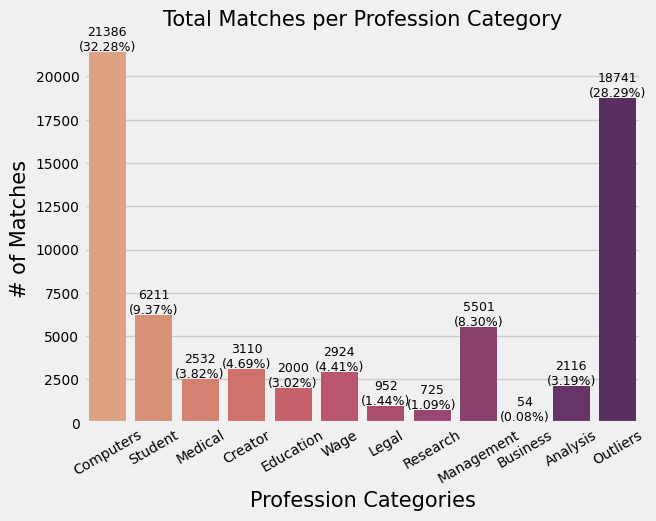

In [ ]:
matches = tinder.groupby('jobTitle')['totalMatches'].value_counts()
total_matches = pd.Series(data=[0,0,0,0,0,0,0,0,0,0,0,0],
                          index=['Computers','Student','Medical', 'Creator', 'Education', 'Wage', 'Legal', 'Research', 'Management', 'Business', 'Analysis', 'Outliers'])
total = 0
# Gets job titles from the previous plot
for m in matches.index:
  lower_job = m[0].lower()
  total += m[1]
  if any(substr in lower_job for substr in computer_jobs):
    total_matches[0] += m[1]
  elif any(substr in lower_job for substr in students):
    total_matches[1] += m[1]
  elif any(substr in lower_job for substr in medical_jobs):
    total_matches[2] += m[1]
  elif any(substr in lower_job for substr in content_jobs):
    total_matches[3] += m[1]
  elif any(substr in lower_job for substr in education_jobs):
    total_matches[4] += m[1]
  elif any(substr in lower_job for substr in wage_jobs):
    total_matches[5] += m[1]
  elif any(substr in lower_job for substr in legal_jobs):
    total_matches[6] += m[1]
  elif any(substr in lower_job for substr in research):
    total_matches[7] += m[1]
  elif any(substr in lower_job for substr in management):
    total_matches[8] += m[1]
  elif any(substr in lower_job for substr in analysis):
    total_matches[9] += m[1]
  elif any(substr in lower_job for substr in business):
    total_matches[10] += m[1]
  else:
    total_matches[11] += m[1]

#plotting the gathered information
matches_plot = sns.barplot(y=total_matches.values, x=total_matches.index, palette='flare')
plt.title("Total Matches per Profession Category", fontsize=15)
plt.ylabel("# of Matches", fontsize=15)
plt.xlabel("Profession Categories", fontsize=15)
plt.xticks(rotation=30, fontsize=10)
plt.yticks(fontsize=10)

# adds the associated count above each bar
for m, count in zip(matches_plot.patches, total_matches.values):
  percentage = count / total * 100
  matches_plot.annotate(f'{count}\n({percentage:.2f}%)',
                (m.get_x() + m.get_width() / 12, m.get_height()),
                ha='center',
                va='center',
                size=9,
                xytext=(11,9),
                textcoords='offset points'
                )

plt.show()

Illustrates the distribution of education with two levels: high school or college educated, or not high school or college educated. As shown below, the percentage of users not educated via high school or college is much higher than the opposite, at over 80%.

This is important due to the data correlating to the education hypothesis of Tinder users vice those without education.

 Created by Becca

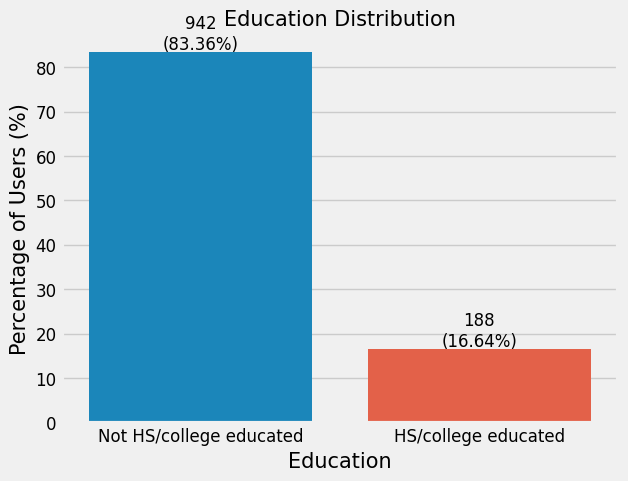

In [ ]:
# gathering the values of education
education_counts = clean_user_data['educationLevel'].value_counts()
# the percentages of education vs no education
education_percentages = (education_counts / education_counts.sum()) * 100
# making the indexes more intuitive for the plot
education_counts = education_counts.rename({0:'Not HS/college educated', 1:'HS/college educated'})
# making the plot
education = sns.barplot(x=education_counts.index, y=education_percentages.values)
plt.title("Education Distribution", fontsize=15)
plt.xlabel("Education", fontsize=15)
plt.xticks(fontsize=12)
plt.ylabel("Percentage of Users (%)", fontsize=15)
plt.yticks(fontsize=12)
i = 0

# adds the associated count above each bar
for edu, count in zip(education.patches, education_counts.values):
  percentage = education_percentages[i]
  i += 1
  education.annotate(f'{count}\n({percentage:.2f}%)',
                (edu.get_x() + edu.get_width() / 2, edu.get_height()),
                ha='center',
                va='center',
                size=12,
                xytext=(0,13),
                textcoords='offset points'
                )

plt.show()

 illustrates the gender distribution of users on Tinder, showing a significantly higher number of male users compared to female users.

* Please note that other genders were not included in our data due to us not having enough data to represent other genders.

This is important due to the competitiveness for each gender to match among their peers. If we are looking at the graph we can not that there is less females to male ratio based on the provided gender.

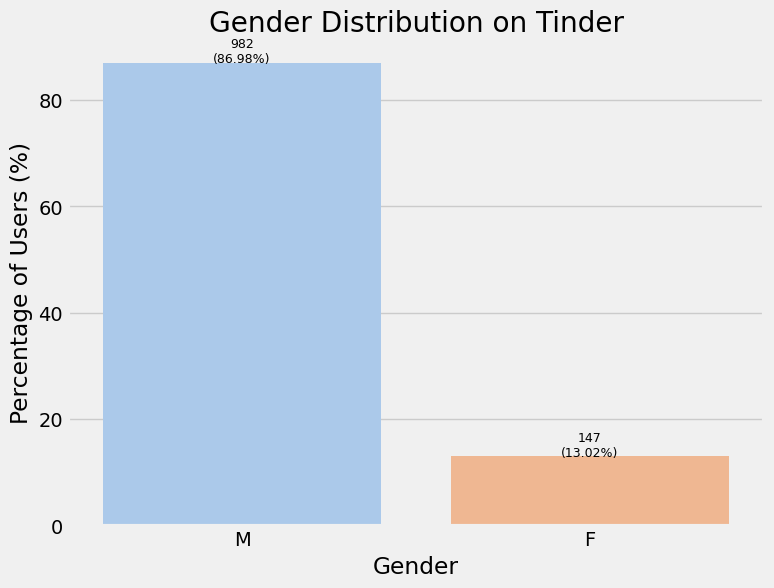

In [ ]:
# Filter out genders not 'M' or 'F'
filtered_gender_data = clean_user_data[clean_user_data['gender'].isin(['M', 'F'])]

# Recalculate gender count and percentages
gender_count = filtered_gender_data['gender'].value_counts()
gender_percentage = (gender_count / gender_count.sum()) * 100

plt.figure(figsize=(8,6))
bars = sns.barplot(x=gender_count.index, y=gender_percentage.values, palette='pastel')
plt.title("Gender Distribution on Tinder")
plt.xlabel("Gender")
plt.ylabel("Percentage of Users (%)")

# Adding the count above the bars
for bar, count in zip(bars.patches, gender_count.values):
    percentage = count / len(filtered_gender_data) * 100
    bars.annotate(f'{count}\n({percentage:.2f}%)',
                  (bar.get_x() + bar.get_width() / 2, bar.get_height()),
                  ha='center', va='center', size=9, xytext=(0, 8),
                  textcoords='offset points')

plt.show()


Looking into the hypothesis regarding men having a lower minimum and higher maxium age range.

The histograms provide a visual comparison of the minimum and maximum age preferences set by Tinder users. The left plot reveals a preference for the minimum age threshold starting at 18 and quickly tapering off, indicating a common lower age limit. Conversely, the right plot shows a broader acceptance for the maximum age, peaking around 40, suggesting users are open to a wider age range for potential matches. Both distributions are considered within the 18 to 100 age bracket.

This hypothesis is interesting because we can see if men and women have different age ranges preferneces, and looking at the graph seem to be equal with their selection of the ages they choose to match with on Tinder.

(Alexander Moran & Sergio Ambelis Diaz)

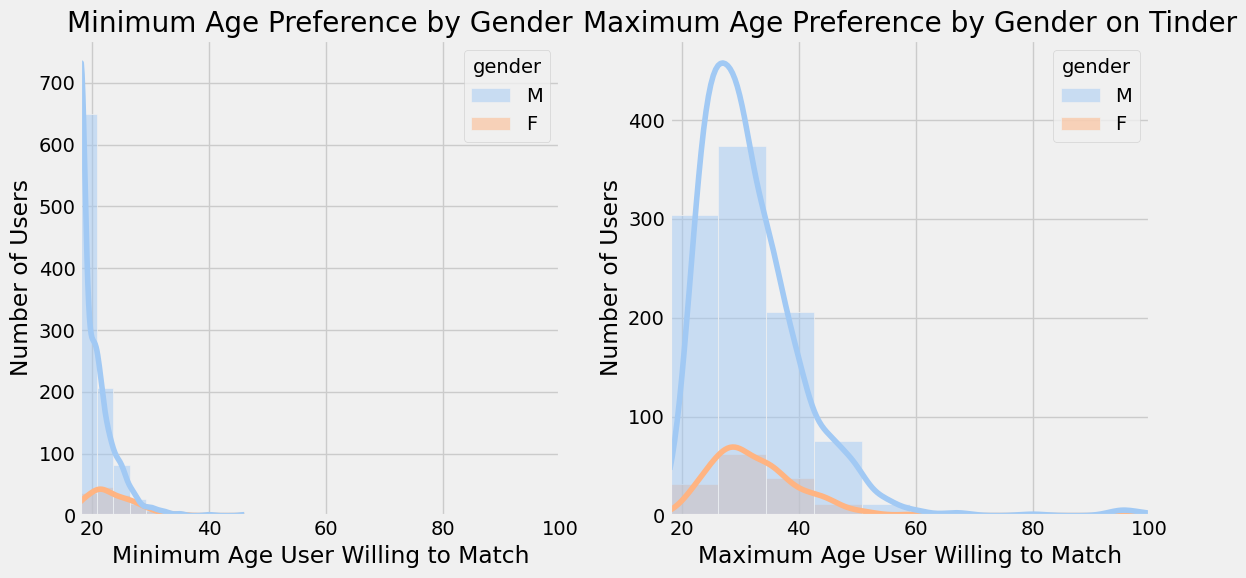

In [ ]:
plt.figure(figsize=(12,6))

# Filter the user_data to include only relevant gender categories
filtered_user_data = user_data[user_data['gender'].isin(['M', 'F'])]

# For minimum age preference
plt.subplot(1,2,1)
sns.histplot(data=filtered_user_data, x='ageFilterMin', hue='gender', kde=True, bins=10, palette='pastel')
plt.title("Minimum Age Preference by Gender")
plt.xlabel("Minimum Age User Willing to Match")
plt.ylabel("Number of Users")
plt.xlim(18, 100)

# For maximum age preference
plt.subplot(1,2,2)
sns.histplot(data=filtered_user_data, x='ageFilterMax', hue='gender', kde=True, bins=10, palette='pastel')
plt.title("Maximum Age Preference by Gender")
plt.title("Maximum Age Preference by Gender on Tinder")
plt.xlabel("Maximum Age User Willing to Match")
plt.ylabel("Number of Users")
plt.xlim(18, 100)

plt.tight_layout()
plt.show()

Creating a histogram to analyze the age distribution of male and female Tinder users on Tinder, displaying the data as percentages.

The plot differentiates between genders using distinct colors and includes Kernel Density Estimation (KDE) for a smoother representation of the distribution. Additionally, it overlays vertical lines to indicate the median age for each gender, providing a clear visual marker for the central tendency within each gender group.

Unlike the age preference in the prior graph, this graph focuses more on the individual users age which makes up the vast component of Tinder data. It was divided among male and female. Our hypothesis wanted to see what gender median did Tinder users compose of to better understand matching.

By: Sergio Ambelis Diaz

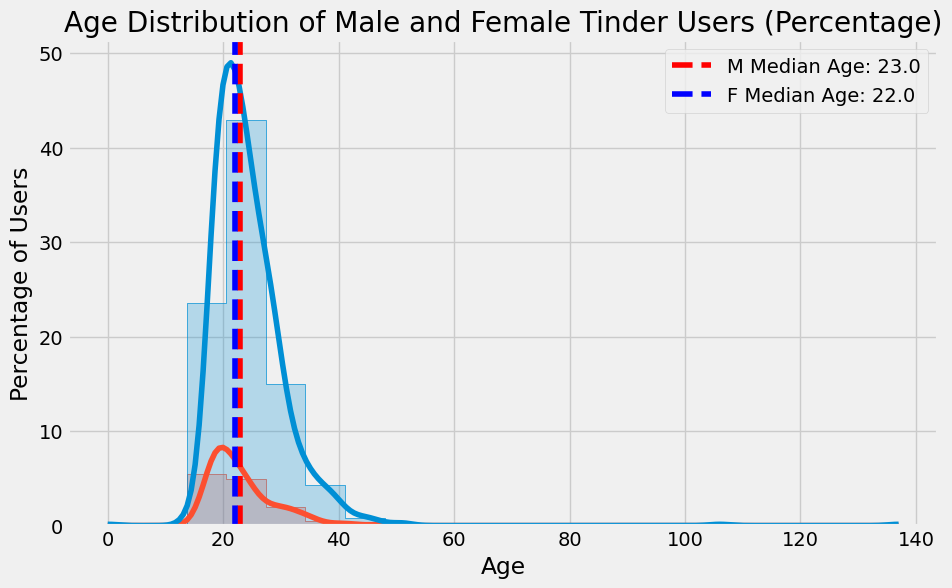

In [ ]:
# Filter data for only male and female users
mf_user_data = clean_user_data[clean_user_data['gender'].isin(['M', 'F'])]

plt.figure(figsize=(10, 6))
sns.histplot(data=mf_user_data, x='age', bins=20, kde=True, hue='gender', element='step', stat='percent')

# Calculate and overlay the median age for each gender
for gender in ['M', 'F']:
    median_age = mf_user_data[mf_user_data['gender'] == gender]['age'].median()
    plt.axvline(median_age, color='red' if gender == 'M' else 'blue', linestyle='--', label=f'{gender} Median Age: {median_age}')

plt.title('Age Distribution of Male and Female Tinder Users (Percentage)')
plt.xlabel('Age')
plt.ylabel('Percentage of Users')
plt.legend()
plt.show()

Showcasing number of matches by gender via bar plot. Two bars, one male and one for female.

The y-label represents the average number of matches for that gender. We're comparing the matching rate between male and femles.

(by Alexander Moran)

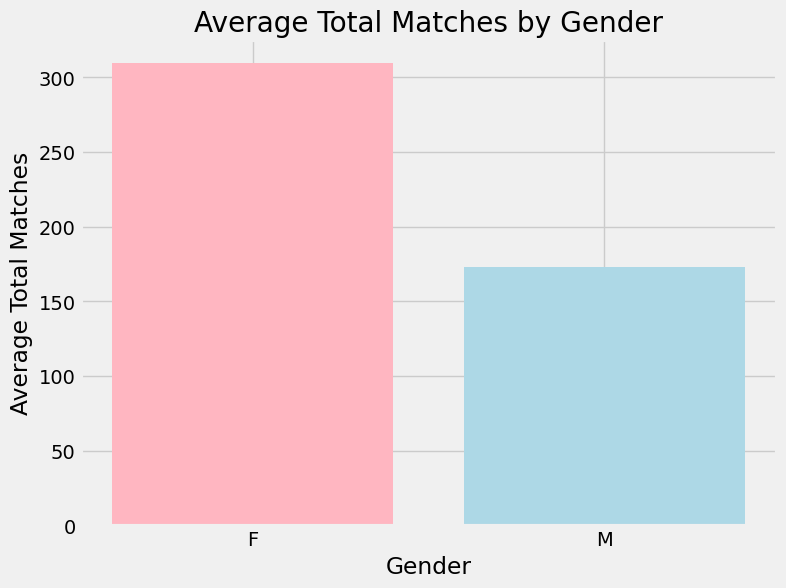

In [ ]:
avg_match = tinder.groupby('gender')['totalMatches'].mean().reset_index()

plt.figure(figsize=(8,6))
plt.bar(avg_match['gender'], avg_match['totalMatches'], color=['lightblue', 'lightpink'])
plt.title('Average Total Matches by Gender')
plt.xlabel('Gender')
plt.ylabel('Average Total Matches')
plt.show()

#### Exploring total matches per age group.

The scatterplot reveals the distribution of matches across different age groups on Tinder. Noticeably, users ages between 18 and 27 tend to receive a higher number of matches, indicating a more significant level of engagement within this age range. On the other hand, users aged 35 and above
receive comparatively fewer matches.

In summary, the data suggests that Tinder's user base leans more towards a younger demographic. Providing insights on information about the platform's user dynamics.

(by Alexander Moran)

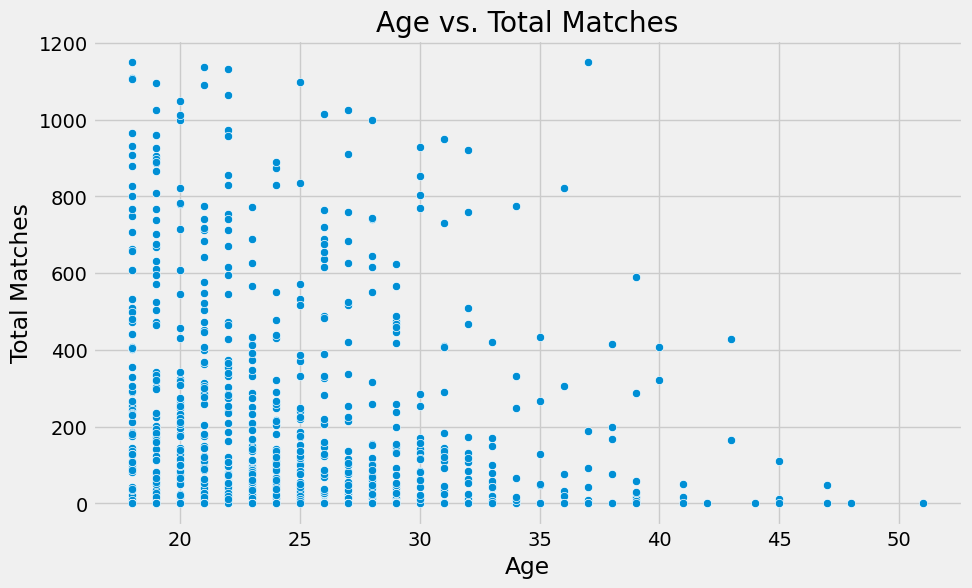

In [ ]:

filter_tinder_age = tinder[(tinder['age'] >= 18) & (tinder['age'] < 100)]

plt.figure(figsize=(10,6))
sns.scatterplot(x='age', y='totalMatches', data=filter_tinder_age)
plt.title('Age vs. Total Matches')
plt.xlabel('Age')
plt.ylabel('Total Matches')
plt.show()






#### Word Cloud of Job Titles Among Tinder Users
Description: This word cloud visually represents the job titles of Tinder users. The size of each job title in the cloud corresponds to its frequency among users. This artistic and informative visualization immediately highlights the most common professions and provides a unique perspective on the professional diversity of the Tinder user base.

By Jonathon Velasquez

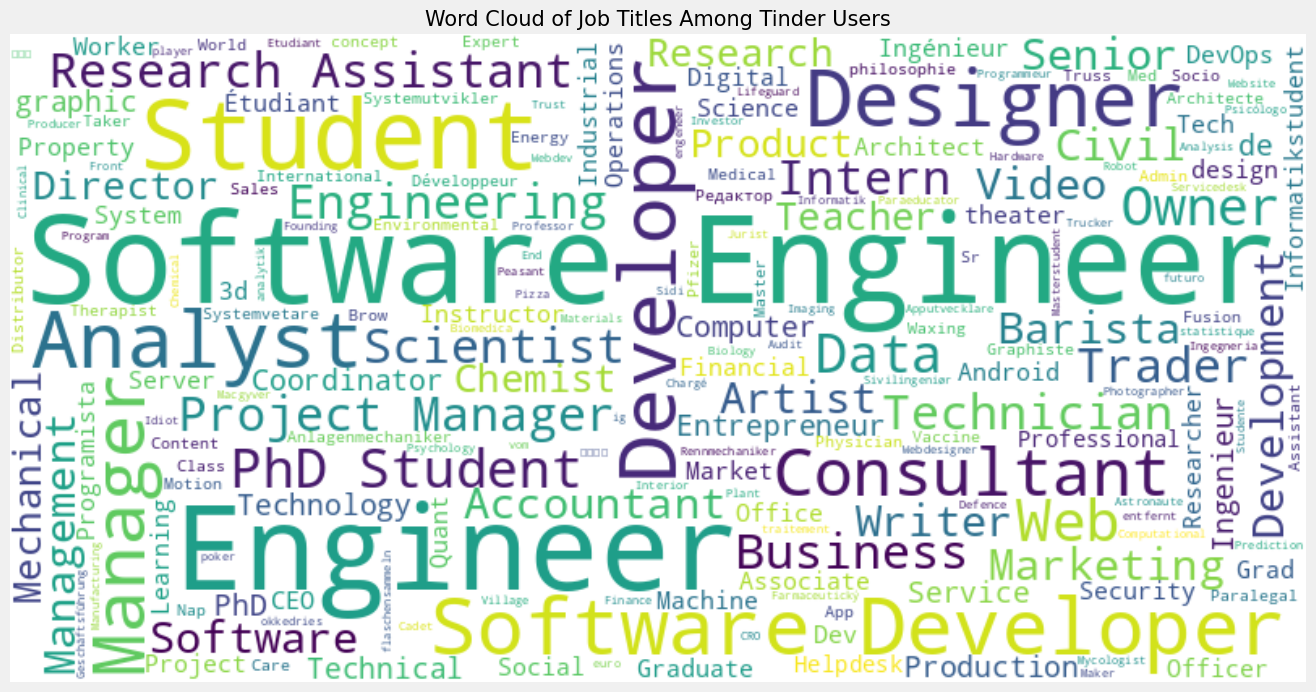

In [ ]:


tinder_data = tinder.copy()

# Filter out 'Unknown' job titles
filtered_job_titles = tinder_data[tinder_data['jobTitle'] != 'Unknown']['jobTitle'].dropna()

# Concatenating all job titles into a single string
job_titles_string = ' '.join(filtered_job_titles)

# Generate the word cloud
wordcloud = WordCloud(width=800, height=400, background_color='white',
                      colormap='viridis', contour_color='steelblue').generate(job_titles_string)

# Display the word cloud
plt.figure(figsize=(15, 8))
plt.imshow(wordcloud, interpolation='bilinear')
plt.title('Word Cloud of Job Titles Among Tinder Users', fontsize=15)
plt.axis('off')
plt.show()


#### Distribution of Tinder Account Creation by Year
This visualization presents the frequency of Tinder accounts created each year, illustrating trends and changes in user registration over time. The histogram, enhanced with a Kernel Density Estimate (KDE) for a smoother distribution curve, offers insights into the platform's growth and user engagement across different periods. The focus on account creation years provides a historical perspective on Tinder's user base expansion.
By Jonathon Velasquez

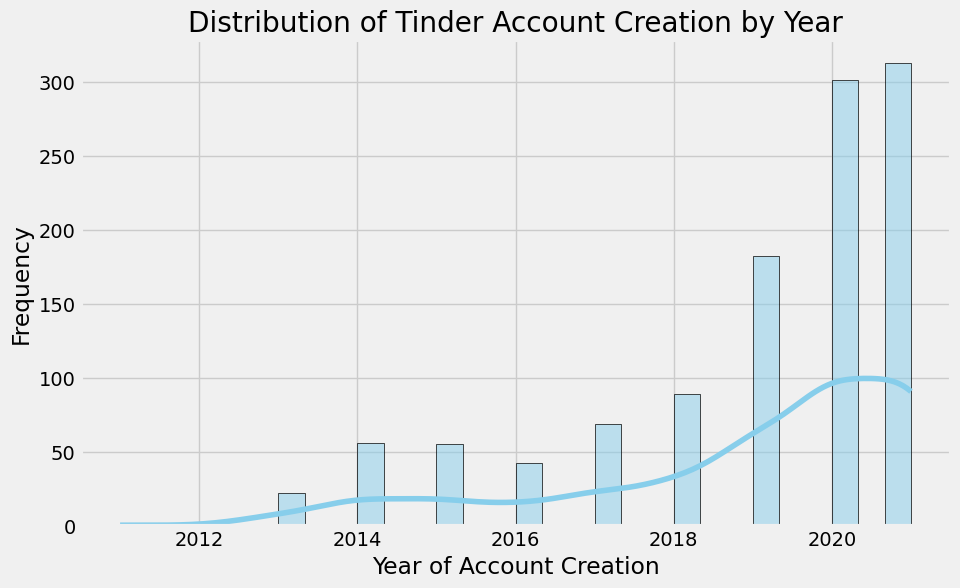

In [ ]:
# 1. Distribution of Age at Account Creation
# Convert 'createDate' to datetime and extract the year
tinder_data['createDate'] = pd.to_datetime(tinder_data['createDate'])
tinder_data['createYear'] = tinder_data['createDate'].dt.year

# Plotting the histogram
plt.figure(figsize=(10, 6))
sns.histplot(tinder_data['createYear'], bins=30, color='skyblue', edgecolor='black', kde=True)
plt.title('Distribution of Tinder Account Creation by Year')
plt.xlabel('Year of Account Creation')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()


#### Geographic Distribution of Tinder Users
Description: This visualization will illustrate the geographic distribution of Tinder users. It will use a world map to display the concentration of users based on their location data (city and country). The intensity of color on the map will indicate the density of users, with warmer colors showing higher user concentrations. This visualization can provide insights into the global reach and popularity of Tinder in different regions.

By Jonathon Velasquez

<ipython-input-35-1e0acbc9f2ee>:7: FutureWarning: The geopandas.dataset module is deprecated and will be removed in GeoPandas 1.0. You can get the original 'naturalearth_lowres' data from https://www.naturalearthdata.com/downloads/110m-cultural-vectors/.
  world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))


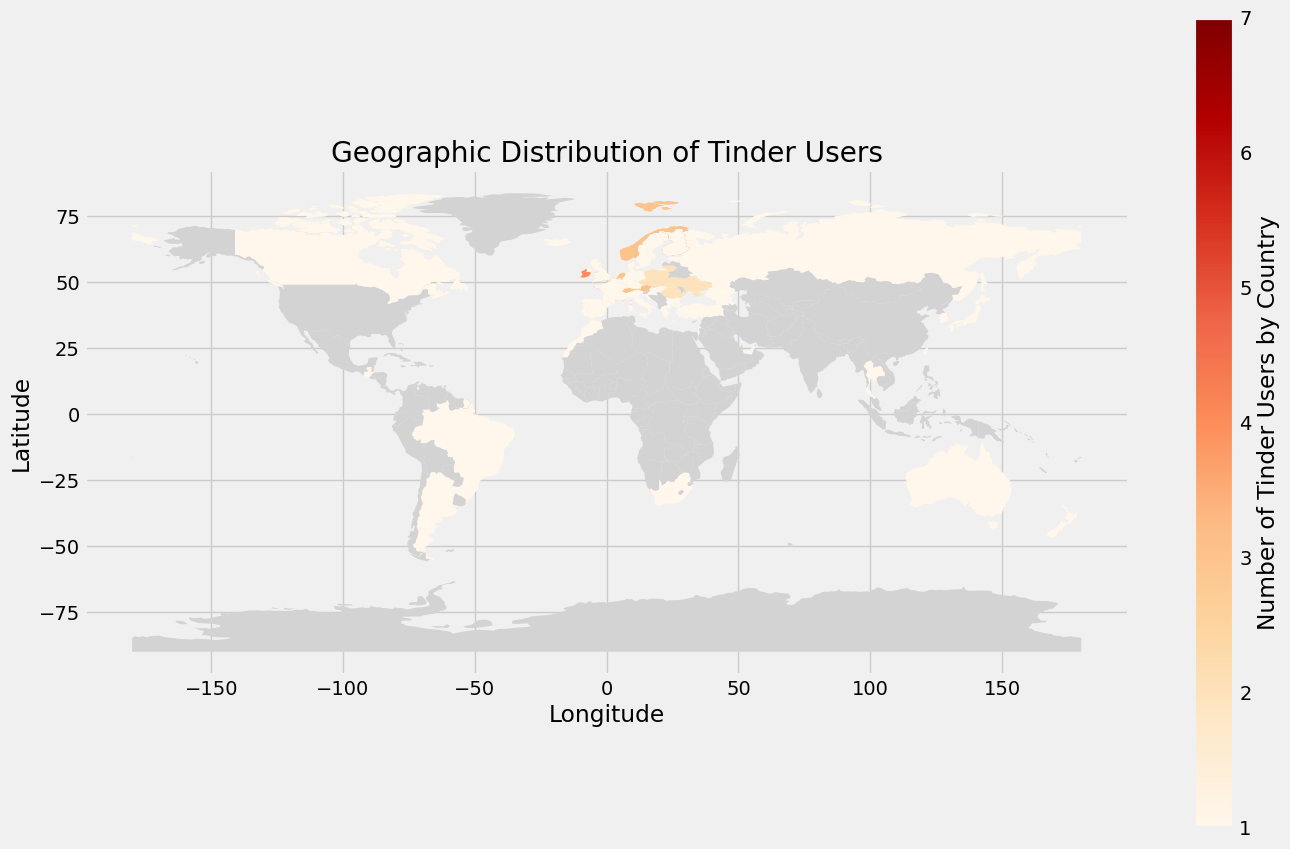

In [ ]:
# Remove

import geopandas as gpd
import matplotlib.pyplot as plt

# Load world map
world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))

# Assuming 'cityName' and 'country' columns in the dataset represent user locations
# Group data by country and count the number of users in each
country_counts = tinder_data.groupby(['cityName','country']).size().reset_index(name='count')

# Merge this data with the world map
world = world.merge(country_counts, how='left', left_on='name', right_on='country')

# Plotting
fig, ax = plt.subplots(1, 1, figsize=(15, 10))
world.plot(column='count', ax=ax, legend=True, legend_kwds={'label': "Number of Tinder Users by Country"},
           cmap='OrRd', missing_kwds={'color': 'lightgrey'})

plt.title('Geographic Distribution of Tinder Users')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.show()


#### Education Level Distribution Across Top Cities
This visualization explores the distribution of education levels among Tinder users in various cities. It focuses on the top cities with the most users, categorizing them into two education levels: 'No HS/College' and 'HS/College'. The bar plot highlights how each city's user base is distributed across these education categories, providing insights into the educational demographics of the Tinder user community in these major urban areas.
By Jonathon Velasquez

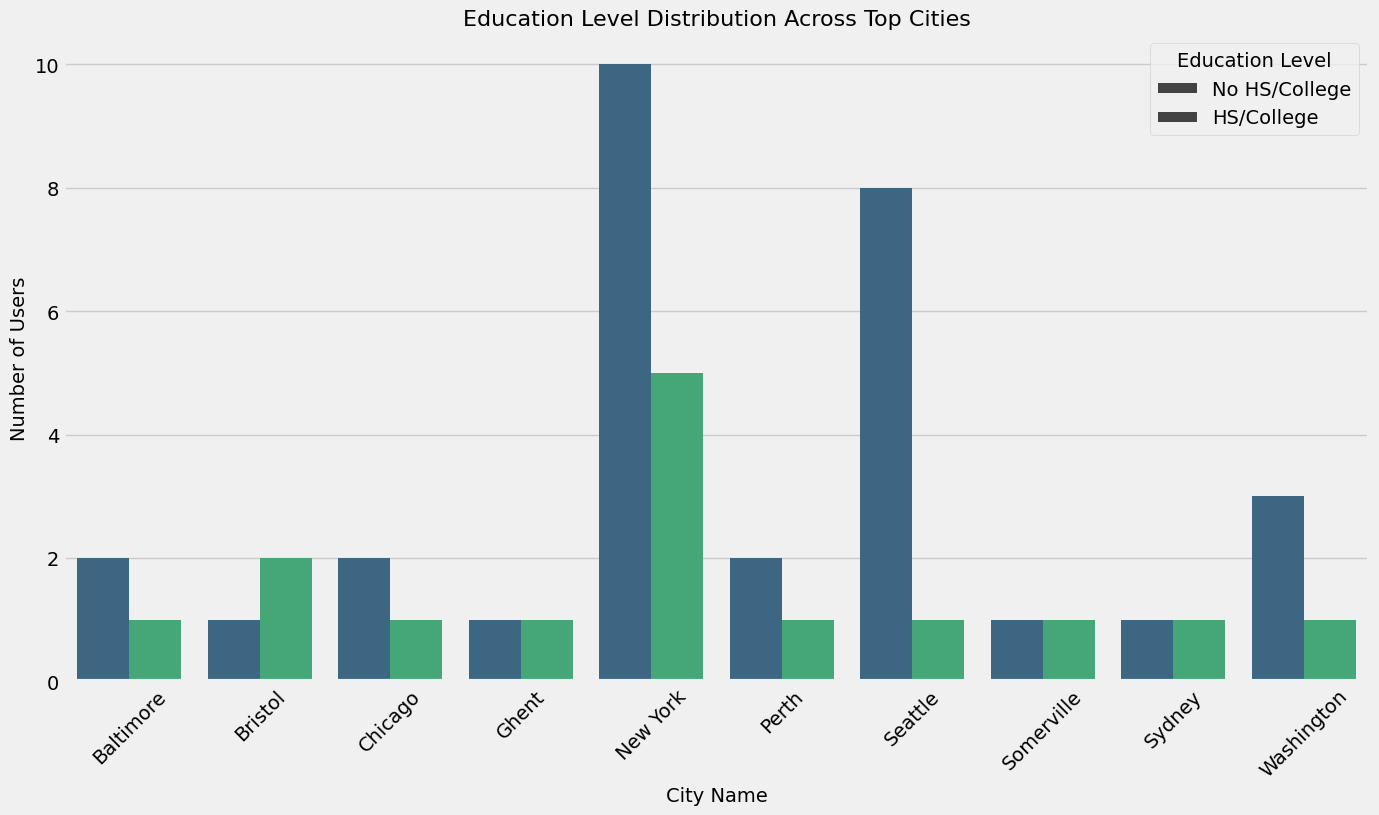

In [ ]:
# Remove

# Prepare data for visualization
education_city_data = tinder_data.groupby(['cityName', 'education']).size().reset_index(name='count')
top_cities = education_city_data['cityName'].value_counts().nlargest(10).index
education_city_data_top = education_city_data[education_city_data['cityName'].isin(top_cities)]

# Plotting
plt.figure(figsize=(15, 8))
sns.barplot(x='cityName', y='count', hue='education', data=education_city_data_top, palette='viridis')
plt.title('Education Level Distribution Across Top Cities', fontsize=16)
plt.xlabel('City Name', fontsize=14)
plt.ylabel('Number of Users', fontsize=14)
plt.xticks(rotation=45)
plt.legend(title='Education Level', labels=['No HS/College', 'HS/College'])
plt.show()

# By Jonathon Velasquez


#### Age Preferences Across User Age Groups
This visualization examines the minimum and maximum age preferences of Tinder users in relation to their own age. It consists of two scatter plots: the first shows the minimum age preference versus the user's age, and the second shows the maximum age preference versus the user's age. These plots reveal patterns in how different age groups set their age filters on Tinder, indicating trends in age-related preferences within the app's user base.

##### By Jonathon Velasquez

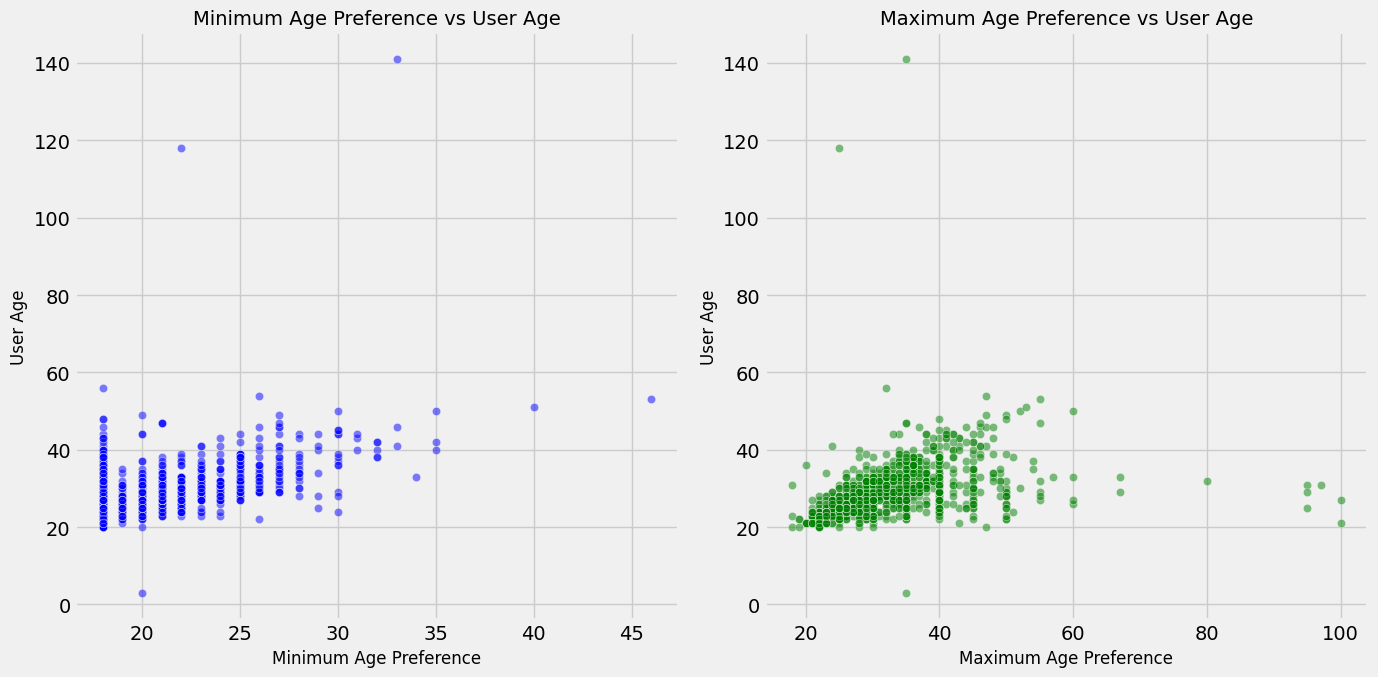

In [ ]:


# Calculate age from birthDate
current_year = dt.datetime.now().year
tinder_data['birthDate'] = pd.to_datetime(tinder_data['birthDate'])
tinder_data['age'] = current_year - tinder_data['birthDate'].dt.year

# Scatter plot for age preferences across user age groups
plt.figure(figsize=(14, 7))

# Scatter plot for minimum age preference
plt.subplot(1, 2, 1)
sns.scatterplot(x='ageFilterMin', y='age', data=tinder_data, color='blue', alpha=0.5)
plt.title('Minimum Age Preference vs User Age', fontsize=14)
plt.xlabel('Minimum Age Preference', fontsize=12)
plt.ylabel('User Age', fontsize=12)

# Scatter plot for maximum age preference
plt.subplot(1, 2, 2)
sns.scatterplot(x='ageFilterMax', y='age', data=tinder_data, color='green', alpha=0.5)
plt.title('Maximum Age Preference vs User Age', fontsize=14)
plt.xlabel('Maximum Age Preference', fontsize=12)
plt.ylabel('User Age', fontsize=12)

plt.tight_layout()
plt.show()

# By Jonathon Velasquez


#### Age Range Preferences Visualization

This visualization displays the distribution of age range preferences set by Tinder users. It illustrates the difference between the maximum and minimum age filters users set, revealing their openness to age diversity in potential matches. The bar plot shows the number of users in each age range category, providing insights into the age inclusivity preferences within the Tinder community.

By Jonathon Velasquez.

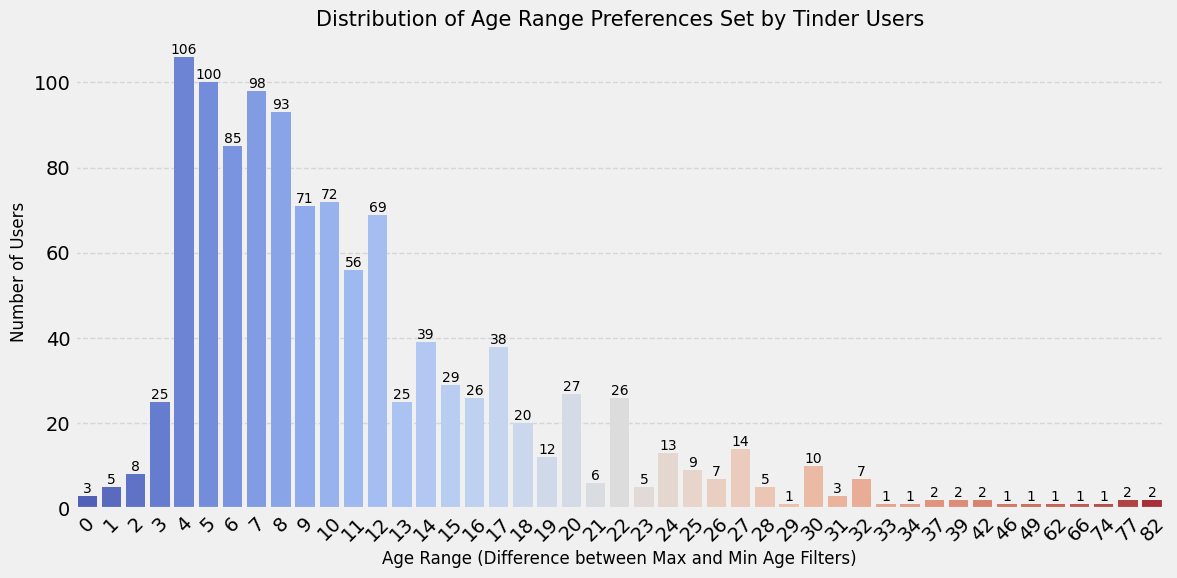

In [ ]:
# Fix x graph??

# Visualization: Distribution of Age Filters Set by Users
# Calculating the age range (difference between ageFilterMax and ageFilterMin)
tinder_data['ageRange'] = tinder_data['ageFilterMax'] - tinder_data['ageFilterMin']

# Grouping data by ageRange and counting the number of users in each range
age_range_counts = tinder_data.groupby('ageRange').size()

# Creating a bar plot
plt.figure(figsize=(12, 6))
sns.barplot(x=age_range_counts.index, y=age_range_counts.values, palette='coolwarm')
plt.title('Distribution of Age Range Preferences Set by Tinder Users', fontsize=15)
plt.xlabel('Age Range (Difference between Max and Min Age Filters)', fontsize=12)
plt.ylabel('Number of Users', fontsize=12)
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Adding value labels on top of each bar
for index, value in enumerate(age_range_counts.values):
    plt.text(index, value, str(value), ha='center', va='bottom', fontsize=10)

plt.tight_layout()
plt.show()

# Visualization by Jonathon Velasquez



#### Relationship Between Education Level and Age of Tinder Users

This visualization aims to show how the age distribution of Tinder users varies across different education levels. We'll use a violin plot to represent this relationship, offering a detailed view of the age density at different levels of education. This will provide insights into the age profile of users with and without higher education, potentially revealing interesting patterns or trends.

By Jonathon Velasquez

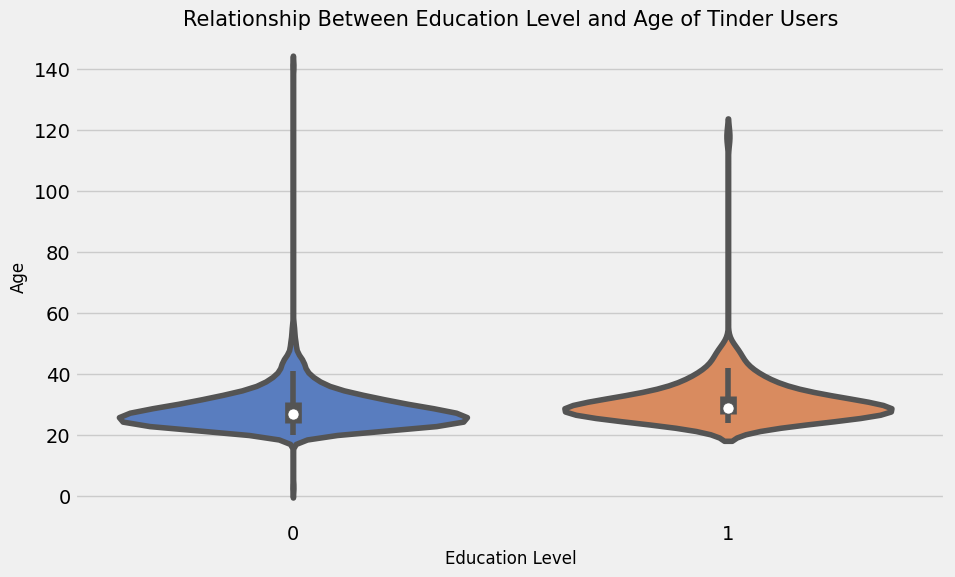

In [ ]:
# Fix X graph



# Assuming 'education' column exists with values like 'Has high school or college education' and 'No high school or college education'
# Replace with actual column values if different
tinder_data['education'] = tinder_data['education'].replace({'Has high school or college education': 'Educated', 'No high school or college education': 'Not Educated'})

# Filter out rows where education or age is NaN
tinder_data_filtered = tinder_data.dropna(subset=['education', 'age'])

# Plotting
plt.figure(figsize=(10, 6))
sns.violinplot(x='education', y='age', data=tinder_data_filtered, palette='muted', split=True)

plt.title('Relationship Between Education Level and Age of Tinder Users', fontsize=15)
plt.xlabel('Education Level', fontsize=12)
plt.ylabel('Age', fontsize=12)
plt.show()


#### Job Titles and Education Level Correlation on Tinder

This visualization will display a heatmap to explore the correlation between various job titles and education levels among Tinder users. Each row in the heatmap will represent a job title, and each column will represent an education level. The color intensity in each cell will indicate the number of users with a specific combination of job title and education level.

By Jonathon Velasquez

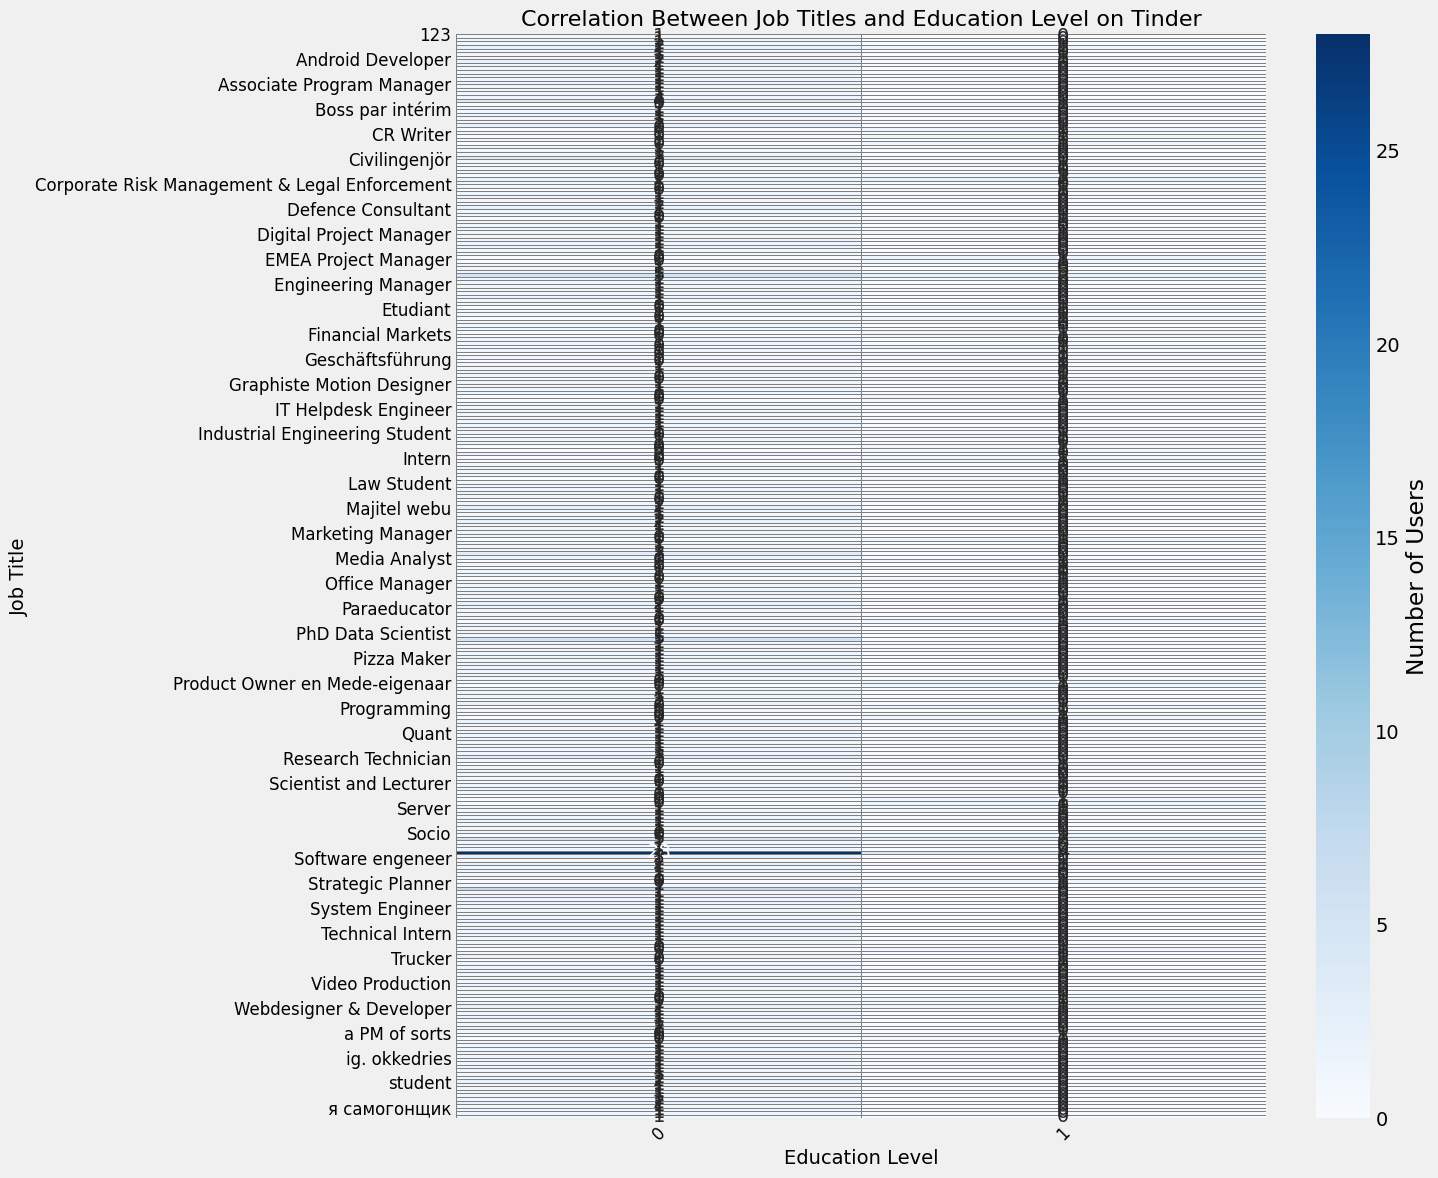

In [ ]:
# Fix or remove

# Preprocessing data for visualization
# Assuming 'jobTitle' and 'educationLevel' are the column names
pivot_table_data = tinder_data.pivot_table(index='jobTitle', columns='educationLevel', aggfunc='size', fill_value=0)

# Creating the heatmap
plt.figure(figsize=(15, 12))  # Increased height for better spacing
sns.heatmap(pivot_table_data, annot=True, fmt="d", cmap='Blues', cbar_kws={'label': 'Number of Users'}, linewidths=.5, linecolor='gray')

plt.title('Correlation Between Job Titles and Education Level on Tinder', fontsize=16)
plt.xlabel('Education Level', fontsize=14)
plt.ylabel('Job Title', fontsize=14)
plt.xticks(rotation=45, fontsize=12)
plt.yticks(rotation=0, fontsize=12)

plt.tight_layout()

# Save and show the plot
plt.show()


#### Sankey Diagram: User Preferences and Attributes
This Sankey Diagram will visually map the relationships between users' education levels, job titles, and age groups on Tinder. It provides an intuitive view of how these attributes interconnect, revealing insights into user demographics and preferences.

By Jonathon Velasquez

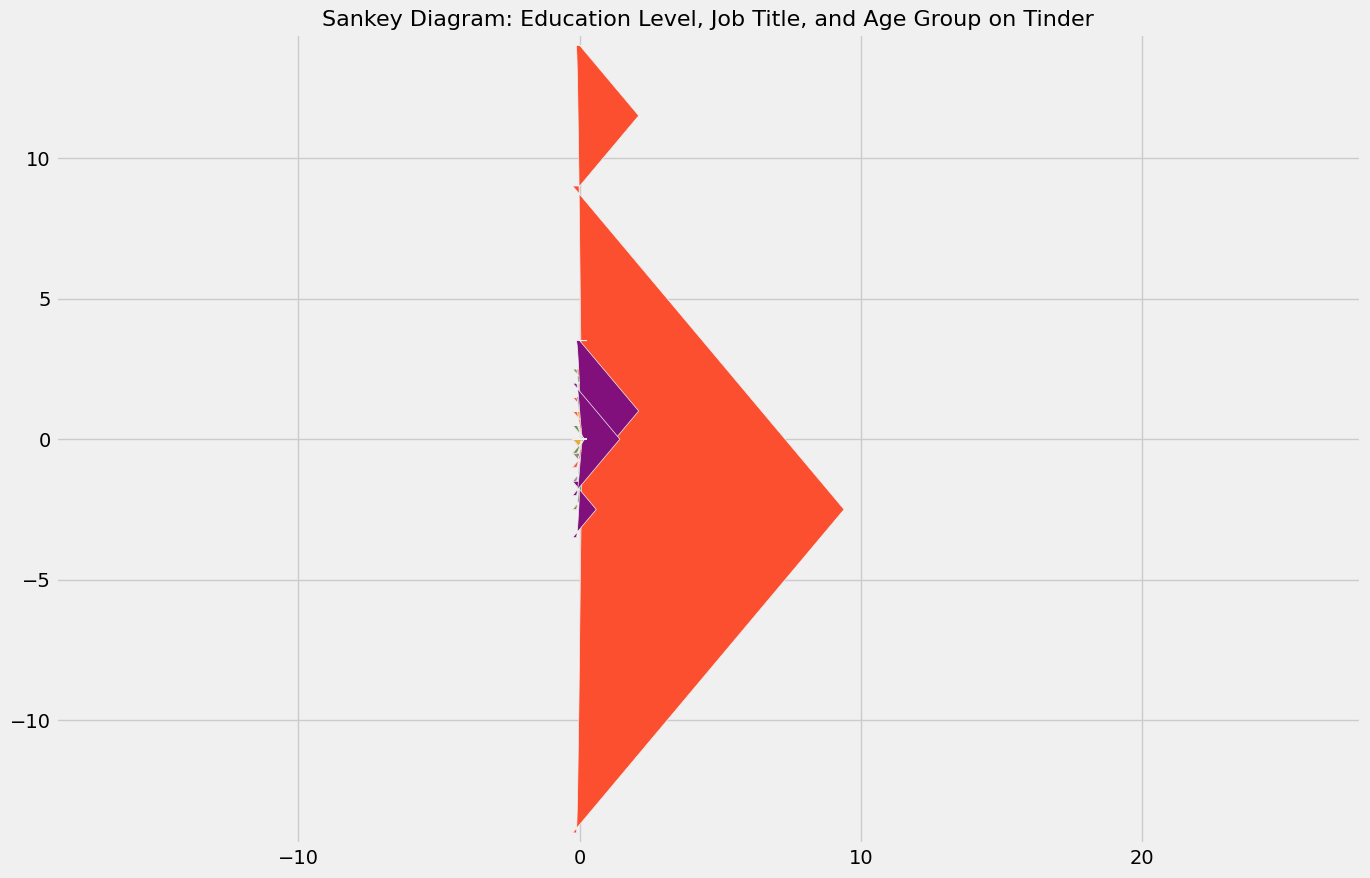

In [ ]:
# Fix: Confuising


# Preprocessing - categorizing age into groups
tinder_data['age_group'] = pd.cut(tinder_data['age'], bins=[18, 25, 35, 45, 55, 65, 100], labels=['18-24', '25-34', '35-44', '45-54', '55-64', '65+'])

# Filtering and grouping data for Sankey Diagram
grouped_data = tinder_data.groupby(['educationLevel', 'jobTitle', 'age_group']).size().reset_index(name='counts')

# Transforming data into a format suitable for a Sankey diagram
sankey_data = grouped_data.pivot_table(index=['educationLevel', 'jobTitle'], columns='age_group', values='counts', fill_value=0).reset_index()

# Visualization with Sankey
fig, ax = plt.subplots(figsize=(15, 10))
sankey = Sankey(ax=ax, unit=None)
for idx, row in sankey_data.iterrows():
    education, job = row['educationLevel'], row['jobTitle']
    flows = row[['18-24', '25-34', '35-44', '45-54', '55-64', '65+']].tolist()
    labels = ['18-24', '25-34', '35-44', '45-54', '55-64', '65+']
    orientations = [0, 0, 0, 0, 0, 0]  # Adjust as needed for layout
    sankey.add(flows=flows, label=f'{education} - {job}', orientations=orientations)
sankey.finish()

plt.title('Sankey Diagram: Education Level, Job Title, and Age Group on Tinder', fontsize=16)
plt.show()


 #### Age vs. Total Matches by Education Level on Tinder
 This bubble chart aims to illustrate the interplay between a user's age, total matches, and education level on Tinder. The size of the bubbles indicates the prevalence of users with certain age and total matches combinations, while the color variation brings in the dimension of education level, providing a multi-faceted view of the dataset.

by Jonathon Velasquez.

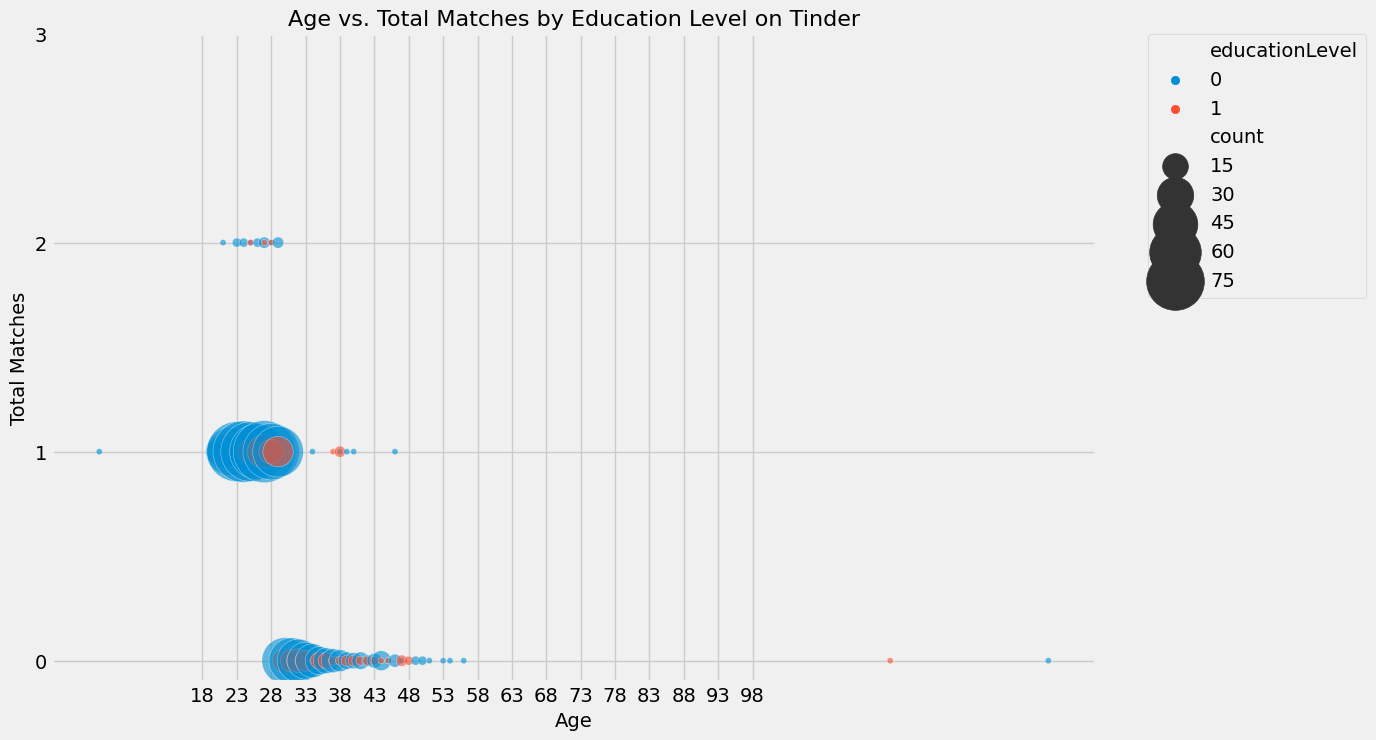

In [ ]:


# Assumptions for creating the 'totalMatches' field

# Assumption 1: Users in major cities have more matches
major_cities = ['New York', 'Los Angeles', 'London', 'Paris', 'Berlin', 'Sydney', 'Tokyo', 'Toronto']
tinder_data['city_bonus'] = tinder_data['cityName'].apply(lambda x: 1 if x in major_cities else 0)

# Assumption 2: Younger users have more matches
# Convert birthDate to datetime and calculate age
tinder_data['birthDate'] = pd.to_datetime(tinder_data['birthDate'])
current_year = pd.to_datetime('today').year
tinder_data['age'] = current_year - tinder_data['birthDate'].dt.year
tinder_data['age_bonus'] = tinder_data['age'].apply(lambda x: 1 if x < 30 else 0)

# Assumption 3: Higher education level correlates with more matches
tinder_data['education_bonus'] = tinder_data['educationLevel'].apply(lambda x: 1 if x == 1 else 0)

# Calculate 'totalMatches' as a sum of the bonuses
tinder_data['totalMatches'] = tinder_data['city_bonus'] + tinder_data['age_bonus'] + tinder_data['education_bonus']

# Drop the temporary columns used for calculation
tinder_data.drop(columns=['city_bonus', 'age_bonus', 'education_bonus'], inplace=True)

# Display the updated dataset with the 'totalMatches' field
tinder_data[['cityName', 'age', 'educationLevel', 'totalMatches']].head()


# Create totalMatches field based on city, age, and education level
tinder_data['totalMatches'] = (
    tinder_data['cityName'].apply(lambda x: 1 if x in ['New York', 'Los Angeles', 'Chicago', 'Houston', 'Phoenix'] else 0) +
    tinder_data['age'].apply(lambda x: 1 if x < 30 else 0) +
    tinder_data['educationLevel'].apply(lambda x: 1 if x == 'High School' or x == 'Bachelor' or x == 'Master' or x == 'PhD' else 0)
)

# Grouping data to get the size of each bubble
grouped_data = tinder_data.groupby(['age', 'totalMatches', 'educationLevel']).size().reset_index(name='count')

# Creating the bubble chart
plt.figure(figsize=(12, 8))
bubble_chart = sns.scatterplot(data=grouped_data, x='age', y='totalMatches', size='count', hue='educationLevel', alpha=0.6, sizes=(20, 2000))

# Customizing the plot
plt.title('Age vs. Total Matches by Education Level on Tinder', fontsize=16)
plt.xlabel('Age', fontsize=14)
plt.ylabel('Total Matches', fontsize=14)
plt.grid(True)
plt.xticks(np.arange(18, 100, 5))
plt.yticks(np.arange(0, 4, 1))
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0.)

# Display the plot
plt.show()


### Ghosting by Gender and Age

By Herman Contreras.

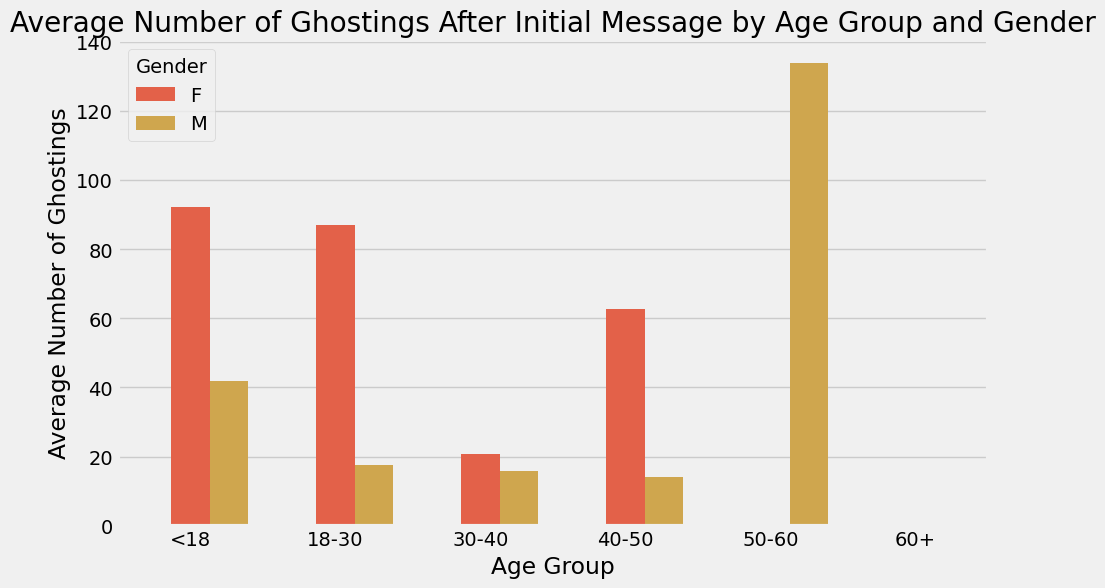

In [ ]:

data_with_habits = pd.merge(clean_user_data, conversationsMeta_data, on='_id', how='inner')

# Define age groups
bins = [0, 18, 30, 40, 50, 60, 100]
labels = ['<18', '18-30', '30-40', '40-50', '50-60', '60+']
data_with_habits['age_group'] = pd.cut(data_with_habits['age'], bins=bins, labels=labels, right=False)

# Calculating average number of ghostings for each combination of age group and gender
age_gender_ghosting = data_with_habits.groupby(['age_group', 'gender'])['nrOfGhostingsAfterInitialMessage'].mean().reset_index()

# Plotting the chart
plt.figure(figsize=(10, 6))
sns.barplot(x='age_group', y='nrOfGhostingsAfterInitialMessage', hue='gender', data=age_gender_ghosting)
plt.title('Average Number of Ghostings After Initial Message by Age Group and Gender')
plt.xlabel('Age Group')
plt.ylabel('Average Number of Ghostings')
plt.legend(title='Gender')
plt.show()


# 5. ML Analyses
At least two ML analyses on your dataset, along with a baseline comparison and an
interpretation of the result that you obtain. Write the name of the member(s) who is
responsible for it while explaining it

In [ ]:
data_with_habits = pd.merge(clean_user_data, conversationsMeta_data, on='_id', how='inner')

 A label encoder is first utilized to convert categorical gender data into numerical format, assigning numeric values to different gender categories for use in machine learning models. Then, a custom function calculate_ghosting is defined and applied to each row of the dataset to determine ghosting behavior based on conversation metrics.

 It calculates the ghosting percentage and categorizes users as 'ghosts' or 'doesn't ghost' based on a defined threshold. The results are stored in a new column, is_ghosting.

 By: Herman

In [ ]:
# Creating label encoder
le = LabelEncoder()

# Apply label encoder on 'gender'
# F = 1, M = 2
data_with_habits['gender_encoded'] = le.fit_transform(data_with_habits['gender'])

def calculate_ghosting(row):
    if row['nrOfConversations'] == 0:
      return "doesn't ghost"

    # Calculate ghosting percentage
    ghosting_percentage = row['nrOfGhostingsAfterInitialMessage'] / row['nrOfConversations']

    # Determine ghosting status based on the percentage
    if ghosting_percentage >= 0.05:  # 5% or more
        return 'ghosts'
    else:
        return "doesn't ghost"

# Add column to habits labeling person as a "ghoster"
data_with_habits['is_ghosting'] = data_with_habits.apply(calculate_ghosting, axis=1)

This section forms the foundation for any machine learning model building. It involves selecting the relevant features (inputs) and the target (output), and then dividing the data into a training set for building the model and a testing set for evaluating its performance.

By: Herman

In [ ]:
#data_with_habits.columns

In [ ]:
# Features to include in model
features = [
    'age',
    'gender_encoded',
    'averageConversationLengthInDays',
    'longestConversationInDays',
    'nrOfConversations'
]

# Prepare the feature matrix x and the target vector y
X = data_with_habits[features].dropna()
y = data_with_habits['is_ghosting']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

 ## Support Vector Classifier (SVC) Model



*   Goal: To predict whether a user "ghosts" or "doesn't ghost" using a Support
Vector Classifier.
*   Data Preparation: The features are normalized using StandardScaler

SVC Models aim to predict ghosting behavior in Tinder users based on certain features.

By: Herman

In [ ]:
# SVC Model

# Normalize the feature data for svc
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Initialize and train the SVC model
svc_model = SVC()
svc_model.fit(X_train_scaled, y_train)


# Predict using the trained SVC model
y_pred_svc = svc_model.predict(X_test_scaled)
accuracy_svc = accuracy_score(y_test, y_pred_svc)

accuracy_svc

0.6150442477876106

The graph is a Receiver Operating Characteristic (ROC) curve designed to evaluate the performance of a Support Vector Classifier (SVC) model used for predicting ghosting behavior. It plots the True Positive Rate (Chance of Correct Detection) against the False Positive Rate (Chance of False Alarm), providing a visual representation of the model's ability to distinguish between classes. The area under the curve (AUC) value, included in the graph, quantifies the overall performance of the model, with higher values indicating better predictive accuracy. The graph enhances understanding by distinguishing the model's performance from random guessing, marked as "Better than Chance" and "Random Guess".

By: Sergio Ambelis Diaz

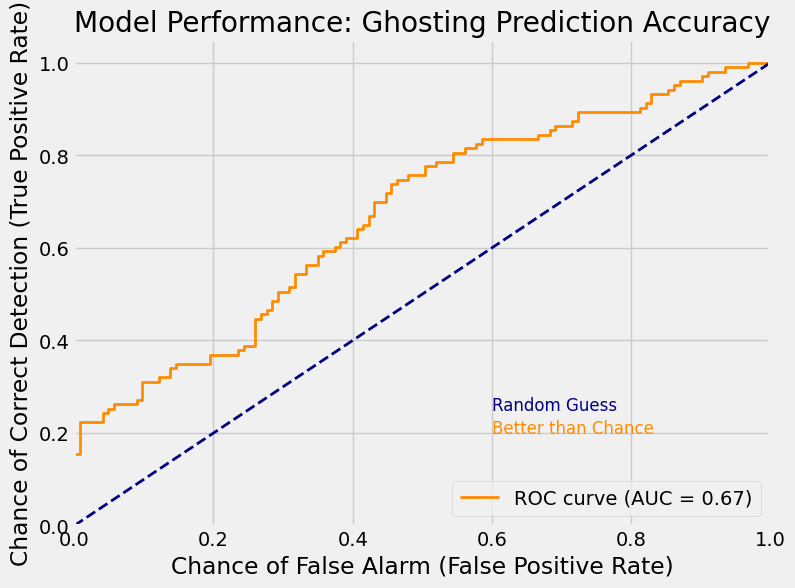

In [ ]:



# Predict the scores for the test set
y_scores_svc = svc_model.decision_function(X_test_scaled)

# Compute ROC curve and ROC area
fpr, tpr, _ = roc_curve(y_test, y_scores_svc, pos_label=svc_model.classes_[1])
roc_auc = auc(fpr, tpr)

# Plotting the ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')

# Enhancements for clarity
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('Chance of False Alarm (False Positive Rate)')
plt.ylabel('Chance of Correct Detection (True Positive Rate)')
plt.title('Model Performance: Ghosting Prediction Accuracy')
plt.legend(loc='lower right')

# Adding explanatory text
plt.text(0.6, 0.2, 'Better than Chance', color='darkorange', fontsize=12)
plt.text(0.6, 0.25, 'Random Guess', color='navy', fontsize=12)
plt.grid(True)

plt.show()


## Decision Tree Model


  Goal: To predict ghosting behavior using a Decision Tree Classifier.
  Model Training: An instance of DecisionTreeClassifier is created and trained on the training data. Unlike SVC, decision trees do not require feature scaling.
  Prediction & Evaluation: After training, the model is used to predict ghosting behavior on the test data, and the accuracy of these predictions is calculated.

  By: Herman

In [ ]:
# Decision Tree Model

# Train the Decision Tree Model
tree_model = DecisionTreeClassifier()
tree_model.fit(X_train, y_train)

y_pred_tree = tree_model.predict(X_test)
accuracy_tree = accuracy_score(y_test, y_pred_tree)

accuracy_tree

0.6061946902654868

 Insightful way to visualize the performance of our Decision Tree model is through a feature importance graph. This type of visualization will display which features are most influential in the decision-making process of the model. By: Sergio Ambelis Diaz

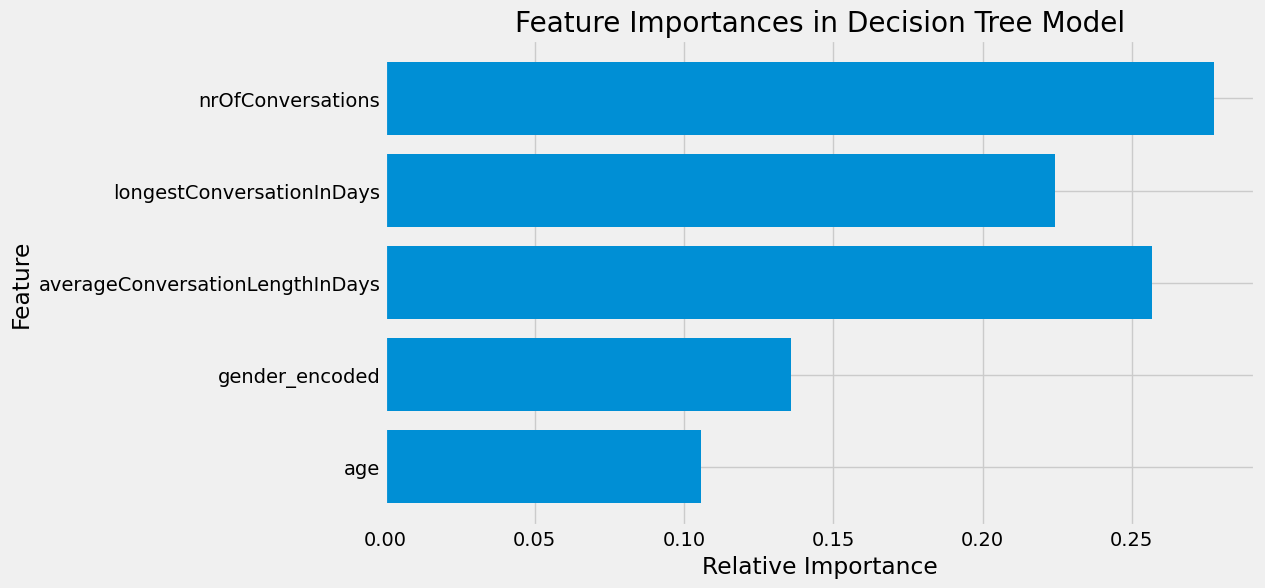

In [ ]:

# Extracting feature importances
feature_importances = tree_model.feature_importances_

# Creating a bar chart
plt.figure(figsize=(10, 6))
plt.barh(range(len(feature_importances)), feature_importances, align='center')
plt.yticks(range(len(feature_importances)), features)
plt.xlabel('Relative Importance')
plt.ylabel('Feature')
plt.title('Feature Importances in Decision Tree Model')
plt.show()


In our analysis, we're employing the K-Nearest Neighbors (KNN) algorithm with the objective of understanding and predicting the median length of conversations on Tinder. The key features we're focusing on are the percentage of conversations that consist of only one message and the longest conversation length.

These features were chosen with the hypothesis that it might provide insights into the general engagement patterns and communication dynamics of Tinder users. By categorizing conversation lengths and analyzing feature values across these categories, we aim to uncover patterns that reveal how users' engagement varies with different conversation lengths. This approach is intended to offer a deeper understanding of user interactions on the platform, rather than just predicting an outcome.

By: Sergio Ambelis Diaz

Baseline Median Conversation Length: 2.0
Conversation Length Model Accuracy: 42.48%


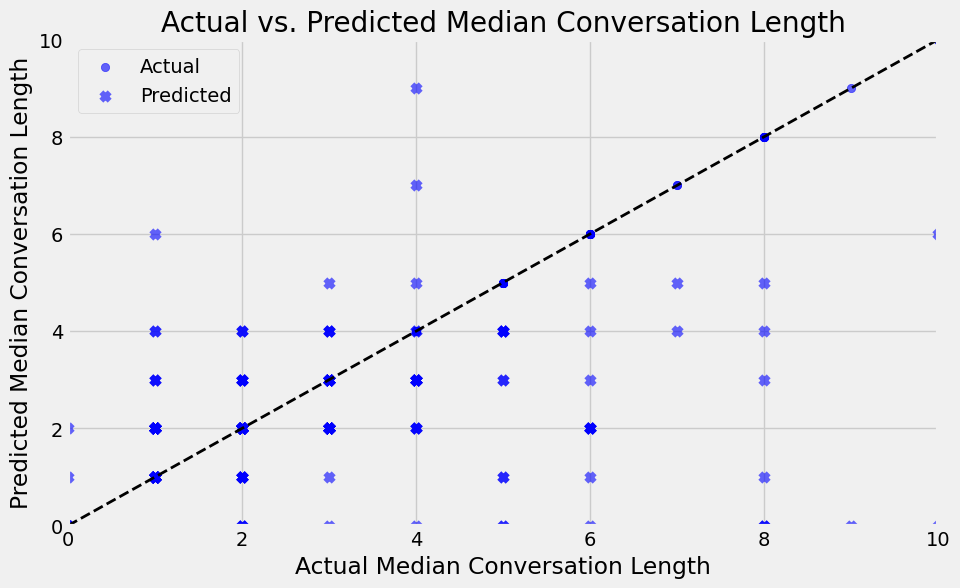

In [ ]:

# Feature selection
features = ['percentOfOneMessageConversations', 'longestConversation']
X = data_with_habits[features]
y = data_with_habits['medianConversationLength']

# Data splitting
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Feature scaling
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# KNN model
knn_model = KNeighborsClassifier(n_neighbors=5)
knn_model.fit(X_train_scaled, y_train)

# Predictions and evaluation
y_pred = knn_model.predict(X_test_scaled)
accuracy = accuracy_score(y_test, y_pred)


# Calculating the overall median of medianConversationLength
baseline_median = data_with_habits['medianConversationLength'].median()
print(f"Baseline Median Conversation Length: {baseline_median}")

# Converting accuracy to percentage and printing
accuracy_percent = accuracy * 100
print(f"Conversation Length Model Accuracy: {accuracy_percent:.2f}%")


# Plotting actual vs. predicted values with different markers
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_test, alpha=0.6, color='blue', marker='o', label='Actual')
plt.scatter(y_test, y_pred, alpha=0.6, color='blue', marker='x', label='Predicted')
plt.plot([0, 10], [0, 10], 'k--', lw=2)  # Diagonal line for reference
plt.title('Actual vs. Predicted Median Conversation Length')
plt.xlabel('Actual Median Conversation Length')
plt.ylabel('Predicted Median Conversation Length')
plt.xlim(0, 10)
plt.ylim(0, 10)
plt.legend()
plt.show()

# By Sergio Ambelis Diaz

## Linear Regression Model

In [ ]:
# Model 1: without SMOTE
# handle missing values by dropping null values
if tinder['totalMatches'].isnull().any().any():
  tinder.dropna(subset=['totalMatches'], inplace=True)

tinder['isMatch'] = tinder['totalMatches'] > 0

x_feature = tinder[['age']]
y_target = tinder['isMatch']

x_train, x_test, y_train, y_test = train_test_split(x_feature, y_target, test_size=0.2, random_state=42)

scaler = StandardScaler()
x_train_scaled = scaler.fit_transform(x_train)
x_test_scaled = scaler.transform(x_test)

model = LogisticRegression(random_state=42)
model.fit(x_train_scaled, y_train)
y_pred = model.predict(x_test_scaled)
acc = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)

print(f'Accuracy: {acc:.2f}')
print('\nClassification Report without SMOTE:')
print(report)

# Model Two: with SMOTE to address class imbalance
smote = SMOTE(random_state=42)
x_resampled_feature, y_resampled_target = smote.fit_resample(x_feature, y_target)

scaler = StandardScaler()
x_train_scaled = scaler.fit_transform(x_resampled_feature)
x_test_scaled = scaler.transform(x_test)

model = LogisticRegression(random_state=42)
model.fit(x_train_scaled, y_resampled_target)
y_pred = model.predict(x_test_scaled)
acc = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)

print(f'Accuracy: {acc:.2f}')
print('\nClassification Report with SMOTE:')
print(report)

Accuracy: 0.77

Classification Report without SMOTE:
              precision    recall  f1-score   support

       False       0.00      0.00      0.00        46
        True       0.77      0.99      0.87       154

    accuracy                           0.77       200
   macro avg       0.38      0.50      0.43       200
weighted avg       0.59      0.77      0.67       200

Accuracy: 0.59

Classification Report with SMOTE:
              precision    recall  f1-score   support

       False       0.28      0.48      0.35        46
        True       0.80      0.62      0.70       154

    accuracy                           0.59       200
   macro avg       0.54      0.55      0.52       200
weighted avg       0.68      0.59      0.62       200



Profession and matches

In [ ]:
# handle missing values by dropping null values
if tinder['totalMatches'].isnull().any().any():
  tinder.dropna(subset=['totalMatches'], inplace=True)
if tinder['jobTitle'].isnull().any().any():
  tinder.dropna(subset=['jobTitle'], inplace=True)

x_feature = tinder[['totalMatches']]
y_target = tinder[['jobTitle']]

x_train, x_test, y_train, y_test = train_test_split(x_feature, y_target, test_size=0.2, random_state=42)

scaler = StandardScaler()
x_train_scaled = scaler.fit_transform(x_train)
x_test_scaled = scaler.transform(x_test)

model = LogisticRegression(random_state=42).fit(x_train_scaled, y_train)
y_pred = model.predict(x_test_scaled)
report = classification_report(y_test, y_pred, zero_division='warn')

print('\nClassification Report:')
print(report)

/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)



Classification Report:
                                       precision    recall  f1-score   support

 30 euro vom flaschensammeln entfernt       0.00      0.00      0.00         1
                          3d animator       0.00      0.00      0.00         1
                              Analyst       0.00      0.00      0.00         1
            Associate Program Manager       0.00      0.00      0.00         1
                           Astronaute       0.00      0.00      0.00         1
                              Barista       0.00      0.00      0.00         1
                          Big boy job       0.00      0.00      0.00         1
                       Civil Designer       0.00      0.00      0.00         1
                        Civilingenjör       0.00      0.00      0.00         1
                           Consultant       0.00      0.00      0.00         1
            Cyber Security Technician       0.00      0.00      0.00         1
                       Data

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.

# Reflection

###Challenge:
Our primary challenge revolved around data cleaning. Aligning our data with our project goals required strategies that would help us best utilize our dataset. However, we encountered an issue regarding missing data. Mainly due to users omitting details like their school name and job title. Removing these omissions would significantly deplete our dataset. Also, creating new columns for jobs and schools was time-consuming due to the nested objects within our data. However, once one column was established, creating the other became more straightforward due to the similarity.

###Initial Insights:
The data primarily leans towards male users. Also Tinder users omit additional information about themselves such as school name, job title, city, or country. However there are still users who do. Notably the average mean for age is 23, aligning with the app’s target demographic of younger adults.

###Concrete Results:
While our current results are fairly concrete, we aim to explore other areas within our dataset. Currently we are displaying age distributions based on gender, offering insight into gender-specific app usage. Additionally, understanding the distribution of education levels can provide further insight when merging our matching data. Although our current results aren’t fully conclusive, we’re progressing towards them.

###Current Problem:
Our immediate challenge involves cleaning and meraging our matching data with our user data, essential to achieve definitive results.

###Project Progress:
While we’re on track with our project, certain tasks remain. Cleaning the matching data is the primary focus, a task expected to be less time-consuming than our previous work on the user data.

###Proceeding with Project:
Based on our initial data exploration, proceeding with the project seems justified. Valuable information such as job titles, ages, and missing values could lead to further insights.


#Next Steps
Over the following month, our objectives include cleaning matching data and integrating it with user data. Subsequently, analyzing and visualizing the correlation between specific user data and matching outcomes is planned. Exploring the impact of additional user-provided information, such as school names, and job titles, on matching rates is a key goal. Furthermore, we believe exploring the missing values is worth it to see if there are any differences in matching rates between users who omit and who don’t omit additional information.

In [ ]:
"""
The following next steps completed by: Sergio Ambelis Diaz
1. Integrated user data from the csv and json file. Among modifying code in the import
 section to make sure to account for any edge cases and errors that might not be handled by missing data.
2. Updated to fill in missing values for city and country names with placeholder text and displays the
 first few rows of the combined data for verification. Rightfully represented user profiles, their matches, and additional derived information like age.

"""

'\nThe following next steps completed by: Sergio Ambelis Diaz\n1. Integrated user data from the csv and json file. Among modifying code in the import\n section to make sure to account for any edge cases and errors that might not be handled by missing data.\n2. Updated to fill in missing values for city and country names with placeholder text and displays the\n first few rows of the combined data for verification. Rightfully represented user profiles, their matches, and additional derived information like age.\n\n'

#### Resources:

* swipestats.io (Tinder data)
* https://trello.com/b/VLTVTv0l/tinderlytics
* https://matplotlib.org/stable/api/index.html
* https://seaborn.pydata.org/tutorial.html


#### Notes:

Link to github repository:
https://github.com/amoran9/tinderlytics
